# Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import shap
from skopt import BayesSearchCV
from sklearn.ensemble import StackingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

/Volumes/Ugreen SSD/Data Science/Proyectos/Sure_Tomorrow_ensurance/mi_entorno/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Carga de Datos

In [2]:
contract = pd.read_csv('/Volumes/Ugreen SSD/Data Science/Visual Studio/Tripleten/Telecom/final_provider/contract.csv')
internet = pd.read_csv('/Volumes/Ugreen SSD/Data Science/Visual Studio/Tripleten/Telecom/final_provider/internet.csv')
personal = pd.read_csv('/Volumes/Ugreen SSD/Data Science/Visual Studio/Tripleten/Telecom/final_provider/personal.csv')
phone = pd.read_csv('/Volumes/Ugreen SSD/Data Science/Visual Studio/Tripleten/Telecom/final_provider/phone.csv')

# Visión general de los datos

In [3]:
display("Contract Data Overview:")
display(contract.head())
display(contract.info())

display("\nPersonal Data Overview:")
display(personal.head())
display(personal.info())

display("\nInternet Data Overview:")
display(internet.head())
display(internet.info())

display("\nPhone Data Overview:")
display(phone.head())
display(phone.info())

'Contract Data Overview:'

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

'\nPersonal Data Overview:'

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

'\nInternet Data Overview:'

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

'\nPhone Data Overview:'

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

El archivo "contract.csv" contiene 7043 filas y 8 columnas. Y no cuenta con valores nulos.
- customerID: Identificador único del cliente.
- BeginDate: Fecha de inicio del contrato.
- EndDate: Fecha de fin del contrato.
- Type: Tipo de contrato. (Month-to-month, One year, Two year)
- PaperlessBilling: Si el cliente tiene facturación electrónica. (Yes, No)
- PaymentMethod: Método de pago. (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: Cargos mensuales.
- TotalCharges: Cargos totales.

El archivo "personal.csv" contiene 7043 filas y 5 columnas. Y no cuenta con valores nulos.
- customerID: Identificador único del cliente.
- gender: Género del cliente. (Female, Male)
- SeniorCitizen: Si el cliente es un adulto mayor. (1: Sí, 0: No)
- Partner: Si el cliente tiene pareja. (Yes, No)
- Dependents: Si el cliente tiene dependientes. (Yes, No)

El archivo "internet.csv" contiene 5517 filas y 8 columnas. Y no cuenta con valores nulos.
- customerID: Identificador único del cliente.
- InternetService: Tipo de servicio de internet. (DSL, Fiber optic, No)
- OnlineSecurity: Si el cliente tiene seguridad en línea. (Yes, No, No internet service)
- OnlineBackup: Si el cliente tiene respaldo en línea. (Yes, No, No internet service)
- DeviceProtection: Si el cliente tiene protección de dispositivo. (Yes, No, No internet service)
- TechSupport: Si el cliente tiene soporte técnico. (Yes, No, No internet service)
- StreamingTV: Si el cliente tiene televisión en streaming. (Yes, No, No internet service)
- StreamingMovies: Si el cliente tiene películas en streaming. (Yes, No, No internet service)

El archivo "phone.csv" contiene 6361 filas y 2 columnas. Y no cuenta con valores nulos.
- customerID: Identificador único del cliente.
- MultipleLines: Si el cliente tiene varias líneas. (Yes, No, No phone service)




# Datos Faltantes

In [4]:
print("\nMissing values in contract data:")
display(contract.isnull().sum())

print("\nMissing values in personal data:")
display(personal.isnull().sum())

print("\nMissing values in internet data:")
display(internet.isnull().sum())

print("\nMissing values in phone data:")
display(phone.isnull().sum())


Missing values in contract data:


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


Missing values in personal data:


customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


Missing values in internet data:


customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


Missing values in phone data:


customerID       0
MultipleLines    0
dtype: int64

Ninguno de los archivos cuenta con datos faltantes y todos los archivos tienen como columna "customerID" que es el identificador único del cliente. Por lo que se puede hacer un merge de los archivos por esta columna. Pero seguiremos analizando los datos

# Estadistica Descriptiva

In [5]:
print("\nContract Data Statistics:")
display(contract.describe(include='all'))

print("\nPersonal Data Statistics:")
display(personal.describe(include='all'))

print("\nInternet Data Statistics:")
display(internet.describe(include='all'))

print("\nPhone Data Statistics:")
display(phone.describe(include='all'))


Contract Data Statistics:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN



Personal Data Statistics:


,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN



Internet Data Statistics:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Phone Data Statistics:


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


Con esta informacion podemos asumir varias cosas, por ejemplo en el archivo de Contratos.

- La mayoria de los valores en EndDate son "No" lo que indica que estos clientes siguen con el servicio, por lo que se puede asumir que son clientes activos.
- La mayoria de los clientes tienen un contrato de mes a mes.
- La mayoria de los clientes tienen facturacion electronica.
- La mayoria de los clientes pagan con cheque electronico.

En el archivo de Personal.

- La mayoria de los clientes son hombres, pero podemos ver una distribucion bastante pareja.
- La mayoria de los clientes no son adultos mayores.
- La mayoria de los clientes no tienen pareja.

En el archivo de Internet.

- La mayoria de los clientes tienen servicio de fibra optica.
- La mayoria de las veces las caracteristicas extras de servicio no estan activas.

# Combinacion de datos

Dado que cada archivo tiene la columna "customerID" podemos hacer un merge de los archivos para tener un solo dataset con toda la informacion.

In [6]:
# Combinar los datos
df = contract.merge(personal, on='customerID', how='left')
df = df.merge(internet, on='customerID', how='left')
df = df.merge(phone, on='customerID', how='left')

In [7]:
# Vista general del DataFrame combinado
print("Combined Data Overview:")
display(df.head())
display(df.info())

Combined Data Overview:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


None

Dado que el archivo de Contratos tiene 7043 filas y los demas archivos tienen menos filas, podemos asumir que hay clientes que no tienen informacion en los otros archivos, por lo que se pueden rellenar con "No".

# Cambiar Tipos de Datos

In [8]:
# Cambio de tipos de datos
df['BeginDate'] = pd.to_datetime(df['BeginDate'])
df['EndDate'] = df['EndDate'].replace('No', pd.NaT)
df['EndDate'] = pd.to_datetime(df['EndDate'])

# Verificar los tipos de datos después de la conversión
print(df.dtypes)


customerID                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges                object
gender                      object
SeniorCitizen                int64
Partner                     object
Dependents                  object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
MultipleLines               object
dtype: object


# Definicion de la variable objetivo

In [9]:
# Definir la variable churn 
df['Churn'] = df['EndDate'].apply(lambda x: 0 if pd.isna(x) else 1)
df['Churn'] = df['Churn'].astype('category')

print(df['EndDate'].isna().sum())


5174


# Rellenar datos faltantes

In [10]:
# Verificar la cantidad de valores NaN en cada columna
print(df.isnull().sum())


customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
Churn                  0
dtype: int64


In [11]:
df.fillna({'InternetService': 'No', 'OnlineSecurity': 'No', 
           'OnlineBackup': 'No', 'DeviceProtection': 'No', 
           'TechSupport': 'No', 'StreamingTV': 'No', 
           'StreamingMovies': 'No', 'MultipleLines': 'No'}, inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
# Verificar la cantidad de valores NaN en cada columna
print(df.isnull().sum())

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
Churn                  0
dtype: int64


In [13]:
# Identificar y mostrar las filas con NaN en 'TotalCharges'
print(df[df['TotalCharges'].isnull()])

# Eliminar filas con valores NaN en 'TotalCharges' si hay alguna
df = df.dropna(subset=['TotalCharges'])

# Verificar la cantidad de valores NaN en cada columna después de eliminar filas
print("Valores NaN por columna después de eliminar 'TotalCharges' NaN:")
print(df.isnull().sum())

      customerID  BeginDate EndDate      Type PaperlessBilling  \
488   4472-LVYGI 2020-02-01     NaT  Two year              Yes   
753   3115-CZMZD 2020-02-01     NaT  Two year               No   
936   5709-LVOEQ 2020-02-01     NaT  Two year               No   
1082  4367-NUYAO 2020-02-01     NaT  Two year               No   
1340  1371-DWPAZ 2020-02-01     NaT  Two year               No   
3331  7644-OMVMY 2020-02-01     NaT  Two year               No   
3826  3213-VVOLG 2020-02-01     NaT  Two year               No   
4380  2520-SGTTA 2020-02-01     NaT  Two year               No   
5218  2923-ARZLG 2020-02-01     NaT  One year              Yes   
6670  4075-WKNIU 2020-02-01     NaT  Two year               No   
6754  2775-SEFEE 2020-02-01     NaT  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  gender  \
488   Bank transfer (automatic)           52.55           NaN  Female   
753                Mailed check           20.25           NaN

In [14]:
# Especificar las columnas donde se deben reemplazar "Yes" y "No" por 1 y 0
columns_to_replace = ['PaperlessBilling', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
df[columns_to_replace] = df[columns_to_replace].replace({'Yes': 1, 'No': 0})


# Convertir género a numérico
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

/var/folders/26/mrzypgf12sn4408nbzkxhgw00000gn/T/ipykernel_75758/3884279266.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_replace] = df[columns_to_replace].replace({'Yes': 1, 'No': 0})


In [15]:
# Verificar la cantidad de valores NaN en cada columna
print(df.isnull().sum())

customerID             0
BeginDate              0
EndDate             5163
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
Churn                  0
dtype: int64


# Convertir columnas categóricas a tipo categórico

In [16]:
# Convertir columnas categóricas a tipo categórico
df['Type'] = df['Type'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')
df['InternetService'] = df['InternetService'].astype('category')

# Verificar las conversiones
print(df.dtypes)

display(df[['Type', 'Churn']].head(10))


customerID                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                      category
PaperlessBilling             int64
PaymentMethod             category
MonthlyCharges             float64
TotalCharges               float64
gender                       int64
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
InternetService           category
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
MultipleLines                int64
Churn                     category
dtype: object


,Type,Churn
0,Month-to-month,0
1,One year,0
2,Month-to-month,1
3,One year,0
4,Month-to-month,1
5,Month-to-month,1
6,Month-to-month,0
7,Month-to-month,0
8,Month-to-month,1
9,One year,0


In [17]:
print(df['Churn'].value_counts())

display(df)

Churn
0    5163
1    1869
Name: count, dtype: int64


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85,0,0,...,0,DSL,0,1,0,0,0,0,0,0
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,1,0,...,0,DSL,1,0,1,0,0,0,0,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,1,0,...,0,DSL,1,1,0,0,0,0,0,1
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,1,0,...,0,DSL,1,0,1,1,0,0,0,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,0,0,...,0,Fiber optic,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,One year,1,Mailed check,84.80,1990.50,1,0,...,1,DSL,1,0,1,1,1,1,1,0
7039,2234-XADUH,2014-02-01,NaT,One year,1,Credit card (automatic),103.20,7362.90,0,0,...,1,Fiber optic,0,1,1,0,1,1,1,0
7040,4801-JZAZL,2019-03-01,NaT,Month-to-month,1,Electronic check,29.60,346.45,0,0,...,1,DSL,1,0,0,0,0,0,0,0
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,1,Mailed check,74.40,306.60,1,1,...,0,Fiber optic,0,0,0,0,0,0,1,1


In [18]:
# Verificar la cantidad de valores NaN en cada columna
print(df.isnull().sum())

customerID             0
BeginDate              0
EndDate             5163
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
Churn                  0
dtype: int64


# Visualizacion de Datos

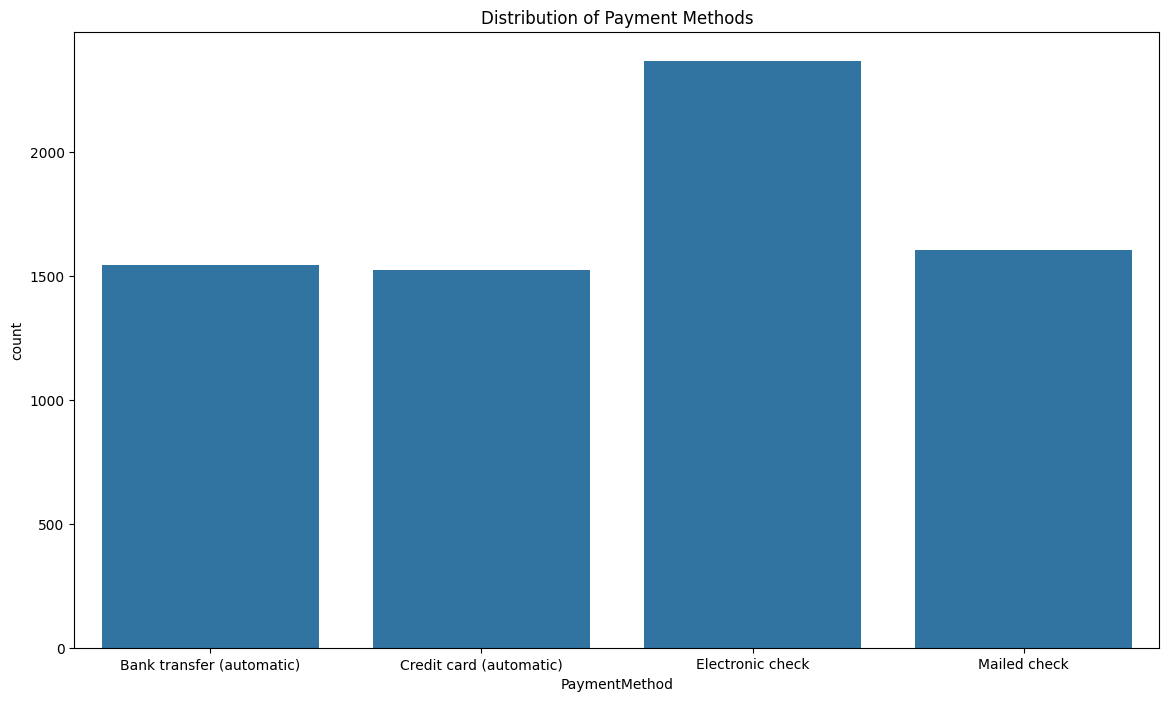

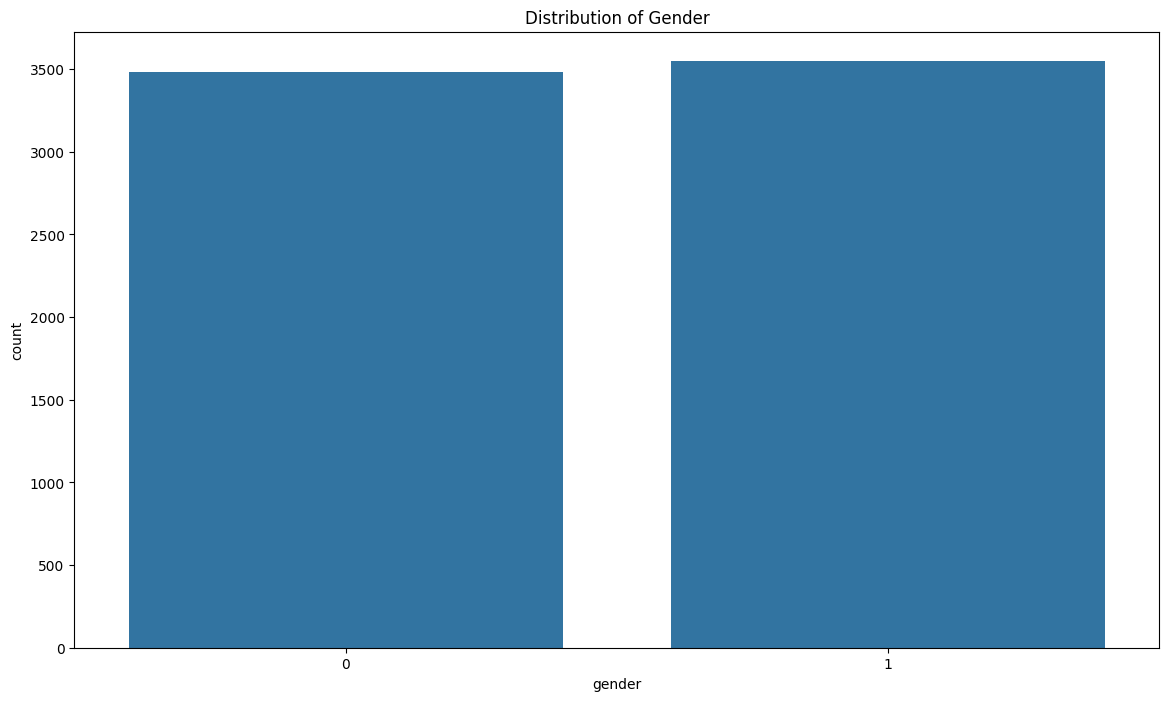

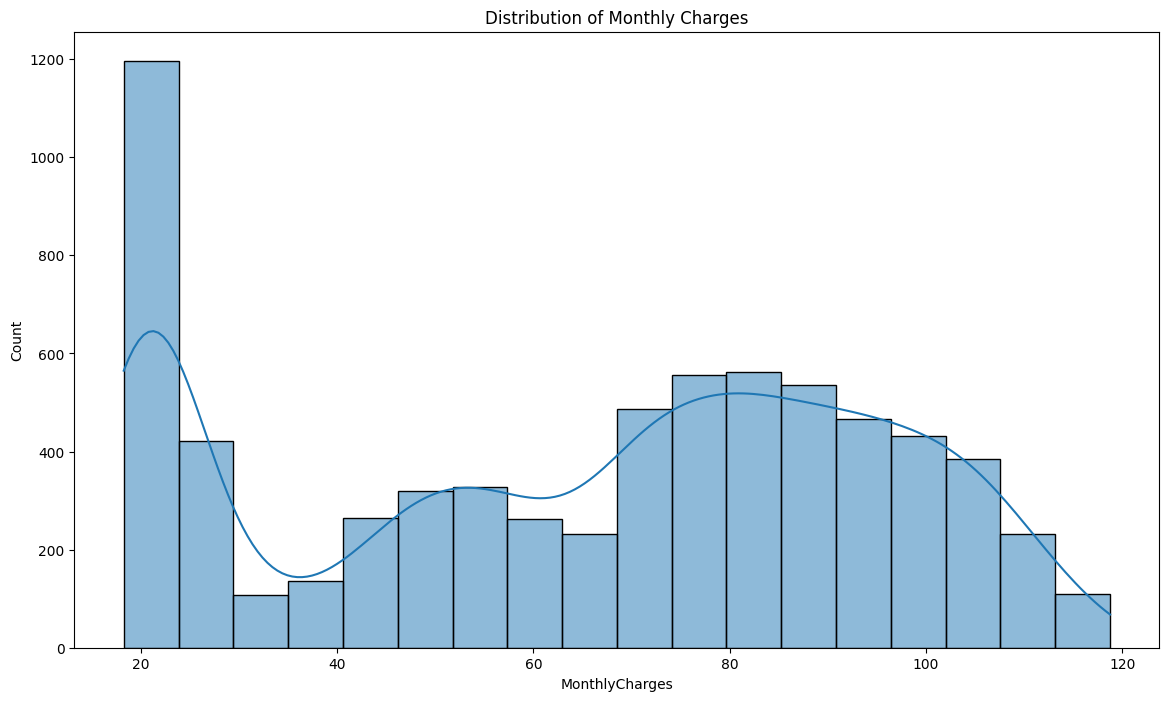

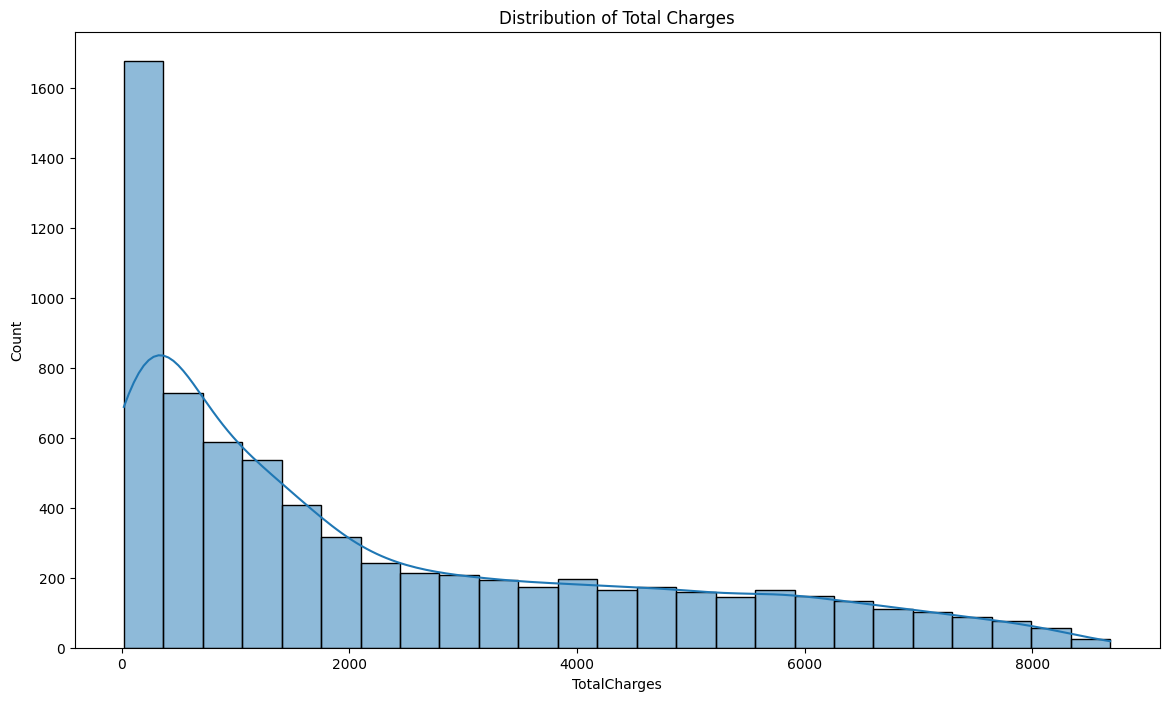

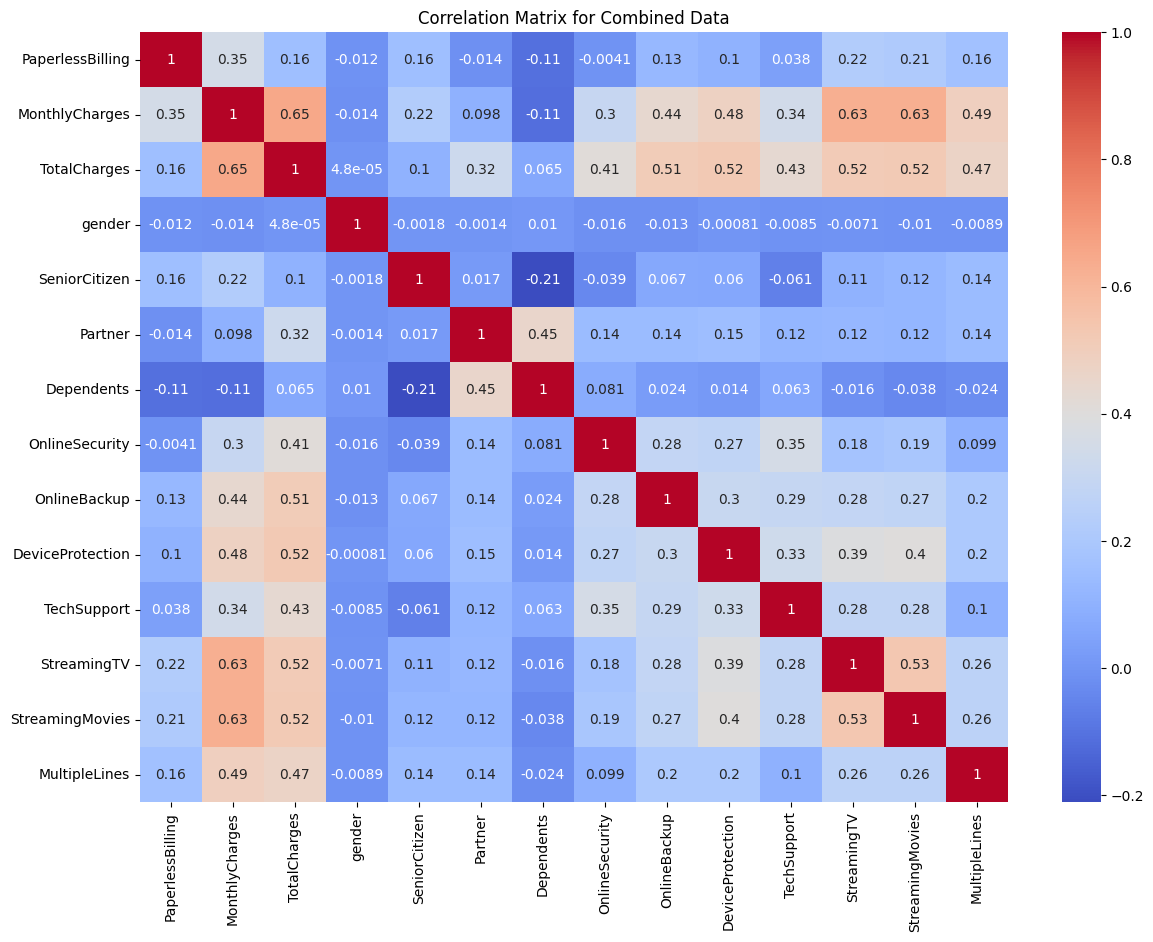

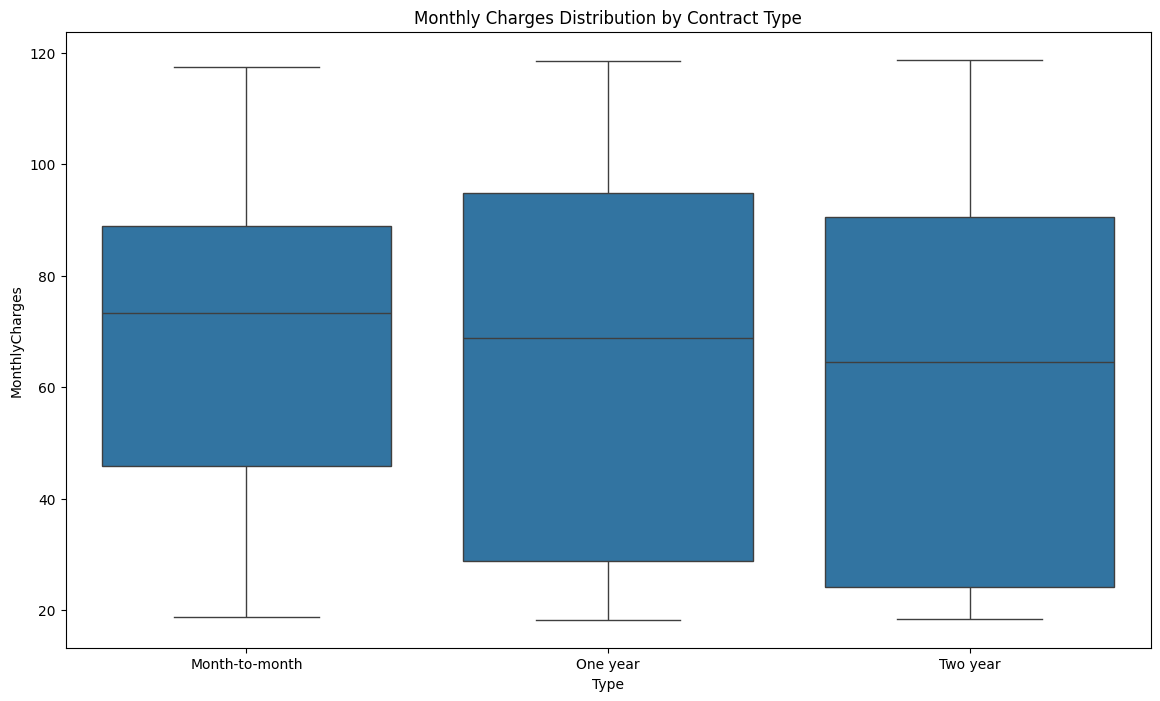

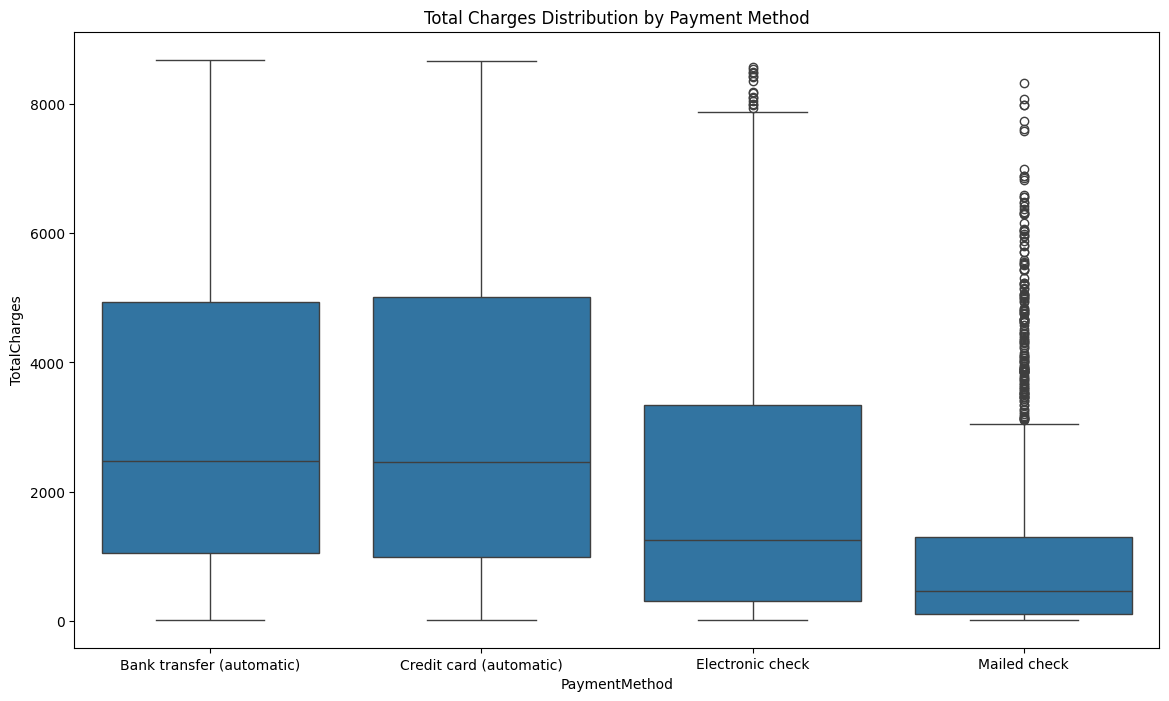

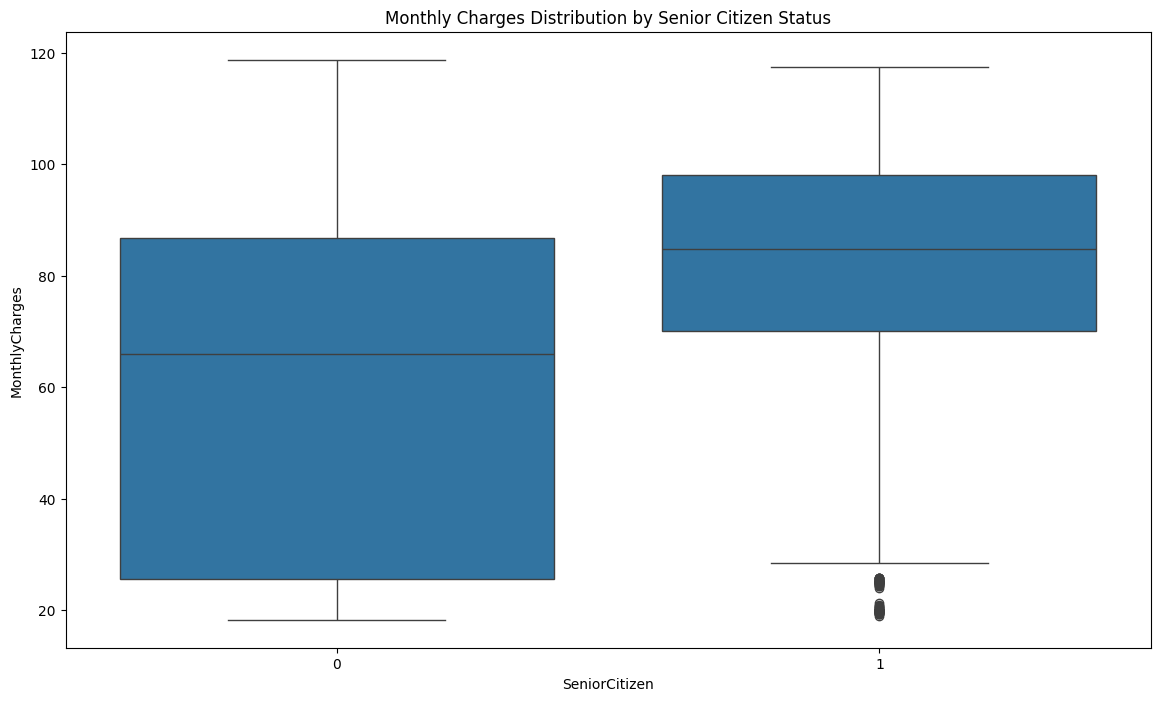

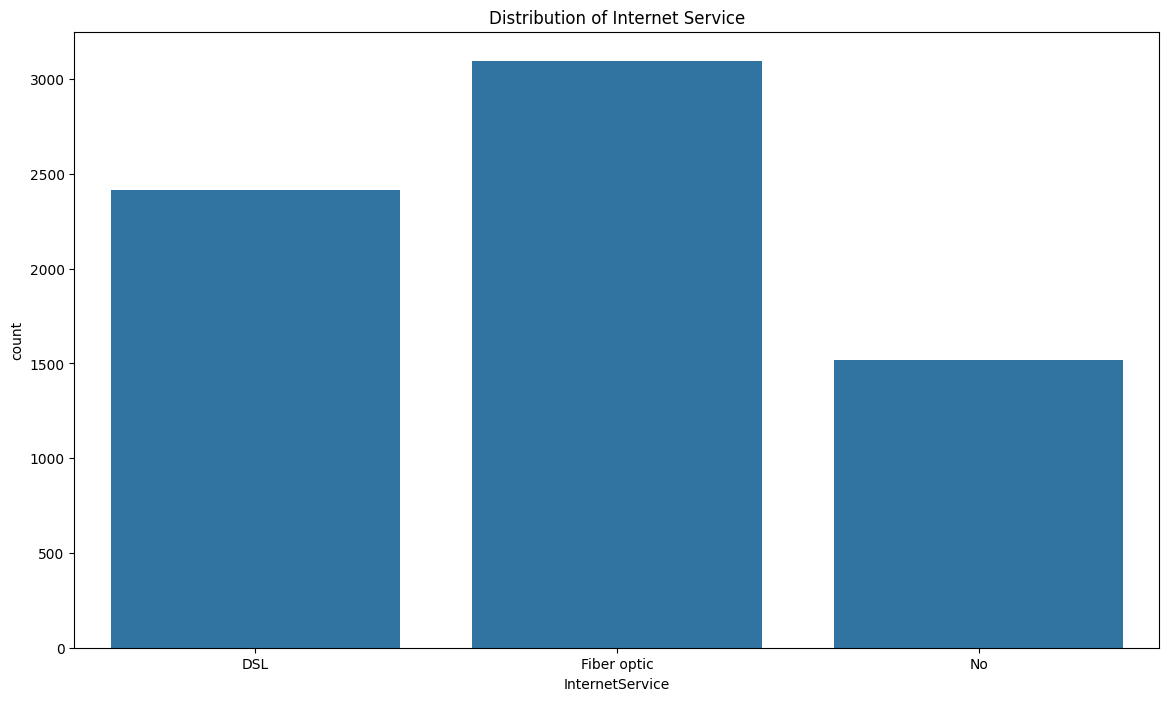

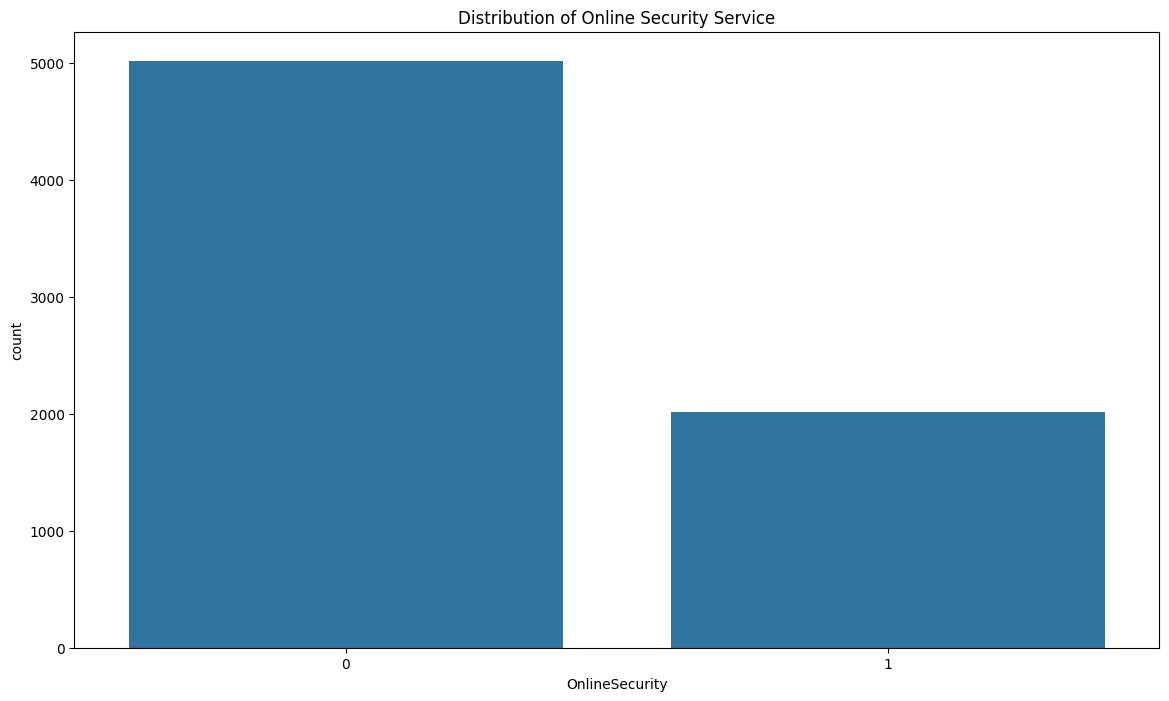

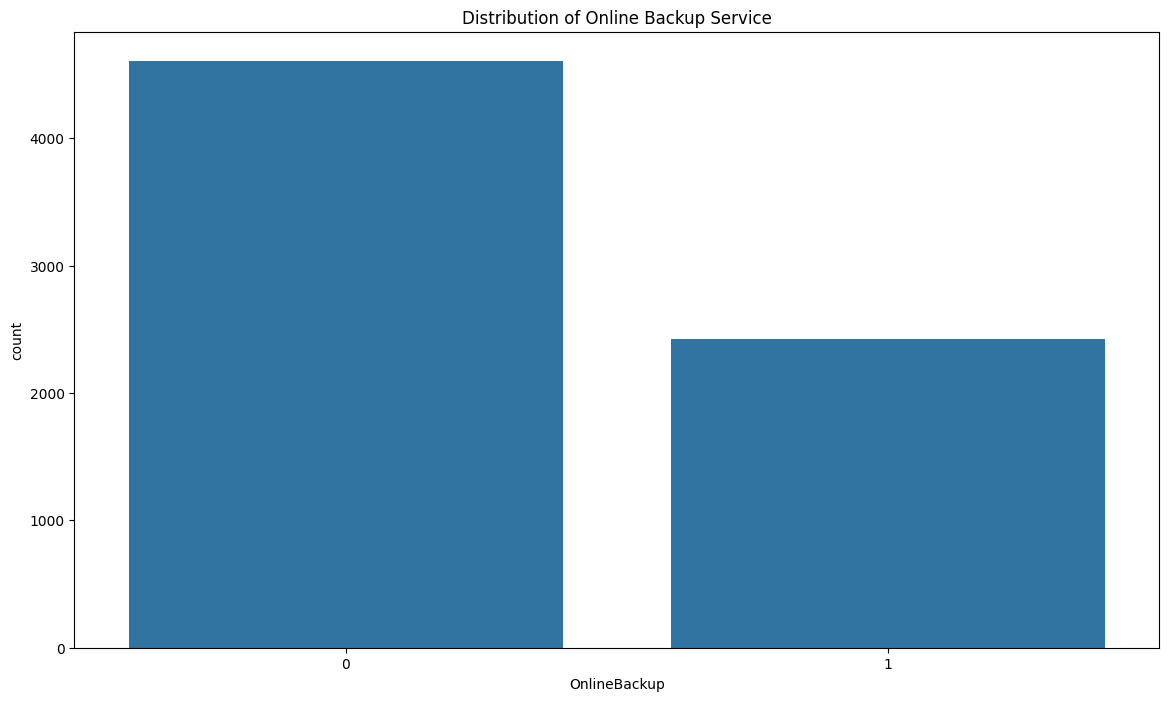

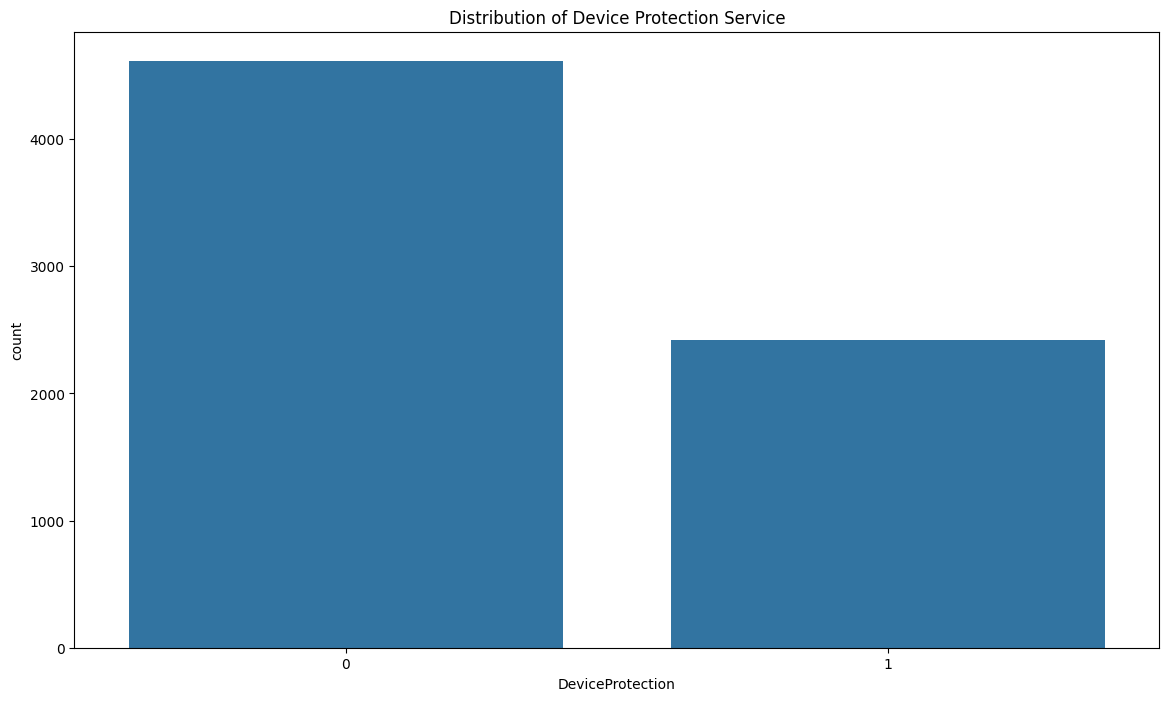

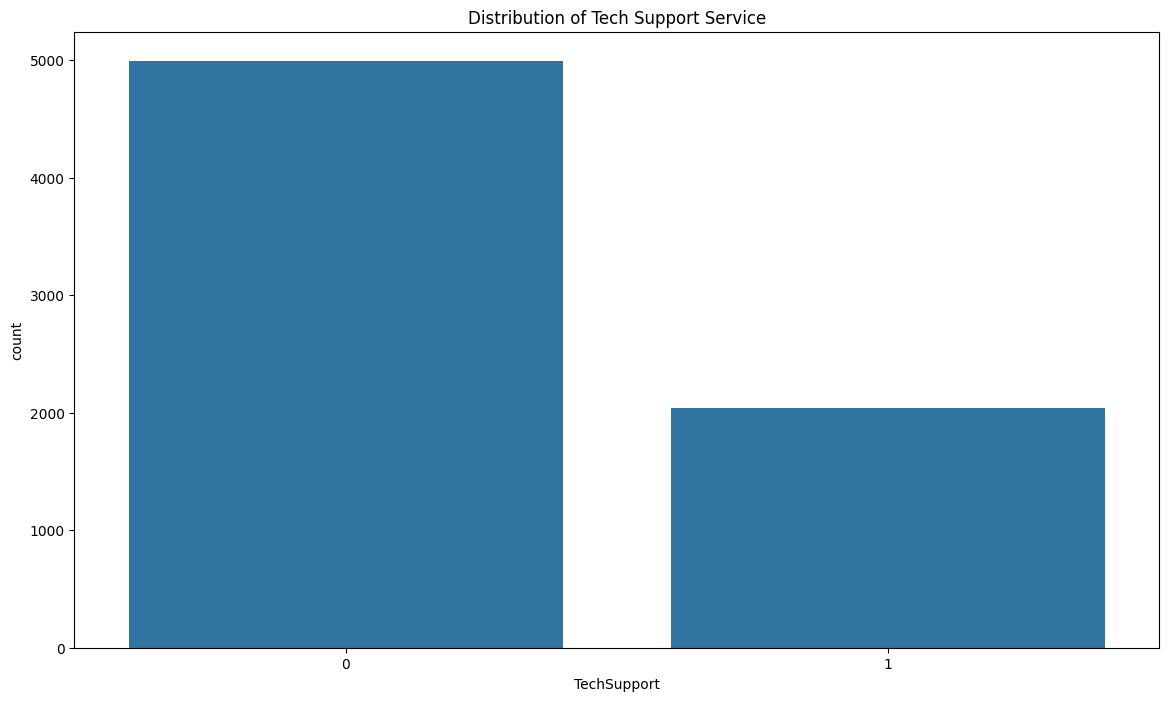

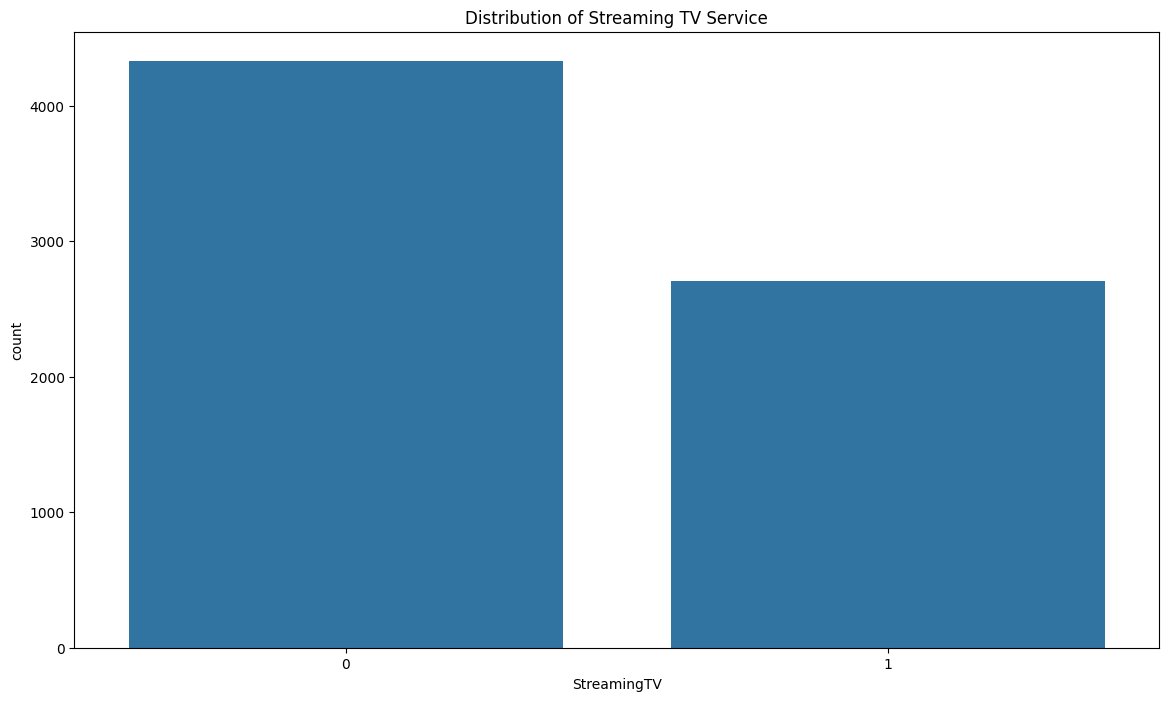

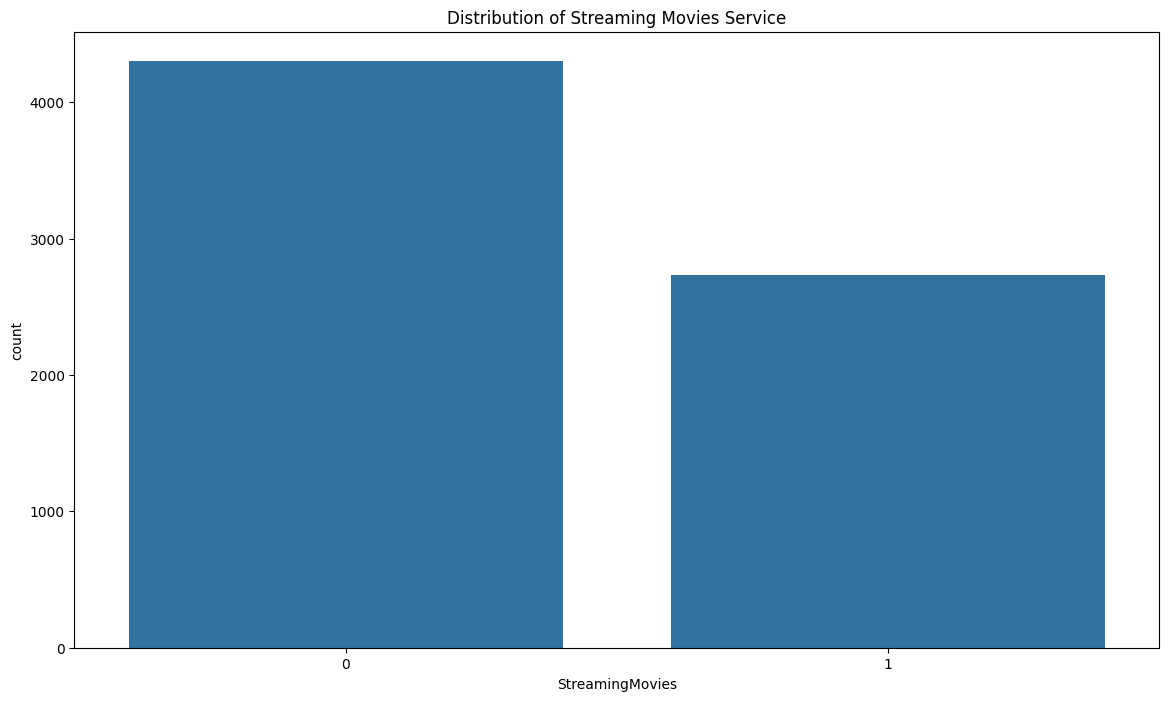

In [19]:
# Visualización de los datos
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='PaymentMethod')
plt.title('Distribution of Payment Methods')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='gender')
plt.title('Distribution of Gender')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='MonthlyCharges', kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='TotalCharges', kde=True)
plt.title('Distribution of Total Charges')
plt.show()

# Eliminar columnas no numéricas antes de calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['int64', 'float64', 'uint8'])

# Correlaciones
plt.figure(figsize=(14, 10))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Combined Data')
plt.show()

# Distribución de MonthlyCharges por tipo de contrato
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Type', y='MonthlyCharges')
plt.title('Monthly Charges Distribution by Contract Type')
plt.show()

# Distribución de TotalCharges por método de pago
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='PaymentMethod', y='TotalCharges')
plt.title('Total Charges Distribution by Payment Method')
plt.show()

# Distribución de MonthlyCharges por si son Senior Citizen
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='SeniorCitizen', y='MonthlyCharges')
plt.title('Monthly Charges Distribution by Senior Citizen Status')
plt.show()

# Distribución de InternetService
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='InternetService')
plt.title('Distribution of Internet Service')
plt.show()

# Uso de servicios adicionales de internet
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='OnlineSecurity')
plt.title('Distribution of Online Security Service')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='OnlineBackup')
plt.title('Distribution of Online Backup Service')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='DeviceProtection')
plt.title('Distribution of Device Protection Service')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='TechSupport')
plt.title('Distribution of Tech Support Service')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='StreamingTV')
plt.title('Distribution of Streaming TV Service')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='StreamingMovies')
plt.title('Distribution of Streaming Movies Service')
plt.show()

# Relacion entre Variables Categoricas y Churn

,Type,Churn
0,Month-to-month,0
1,One year,0
2,Month-to-month,1
3,One year,0
4,Month-to-month,1
5,Month-to-month,1
6,Month-to-month,0
7,Month-to-month,0
8,Month-to-month,1
9,One year,0


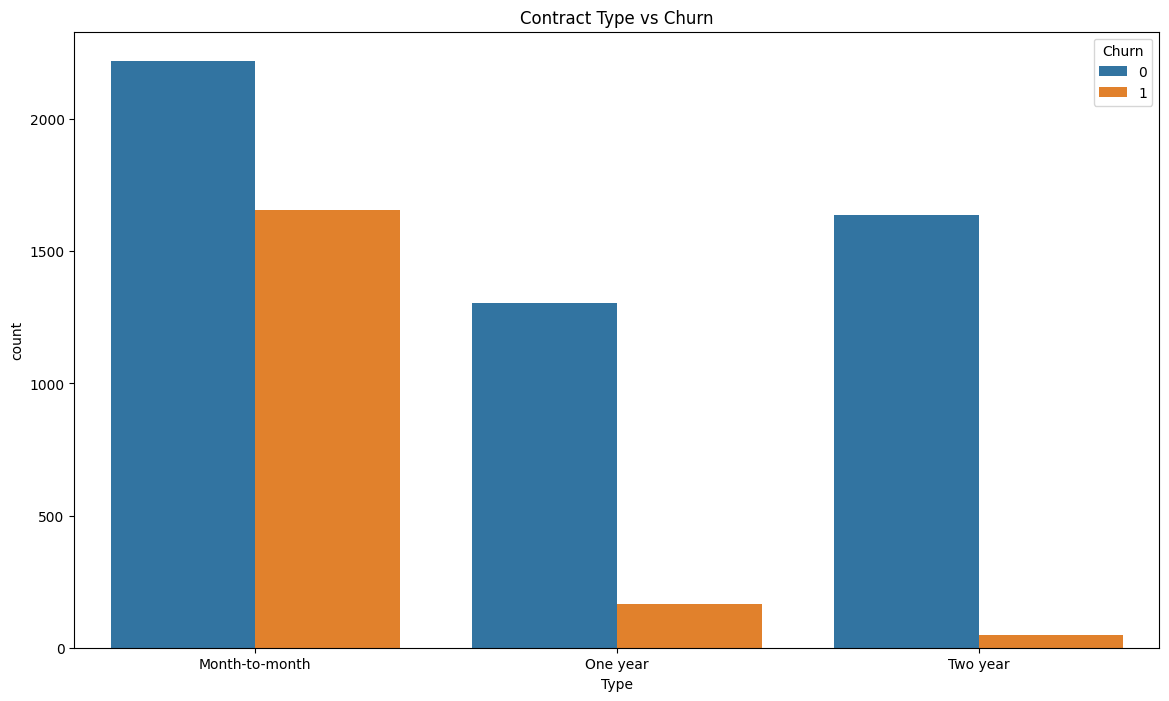

<Figure size 640x480 with 0 Axes>

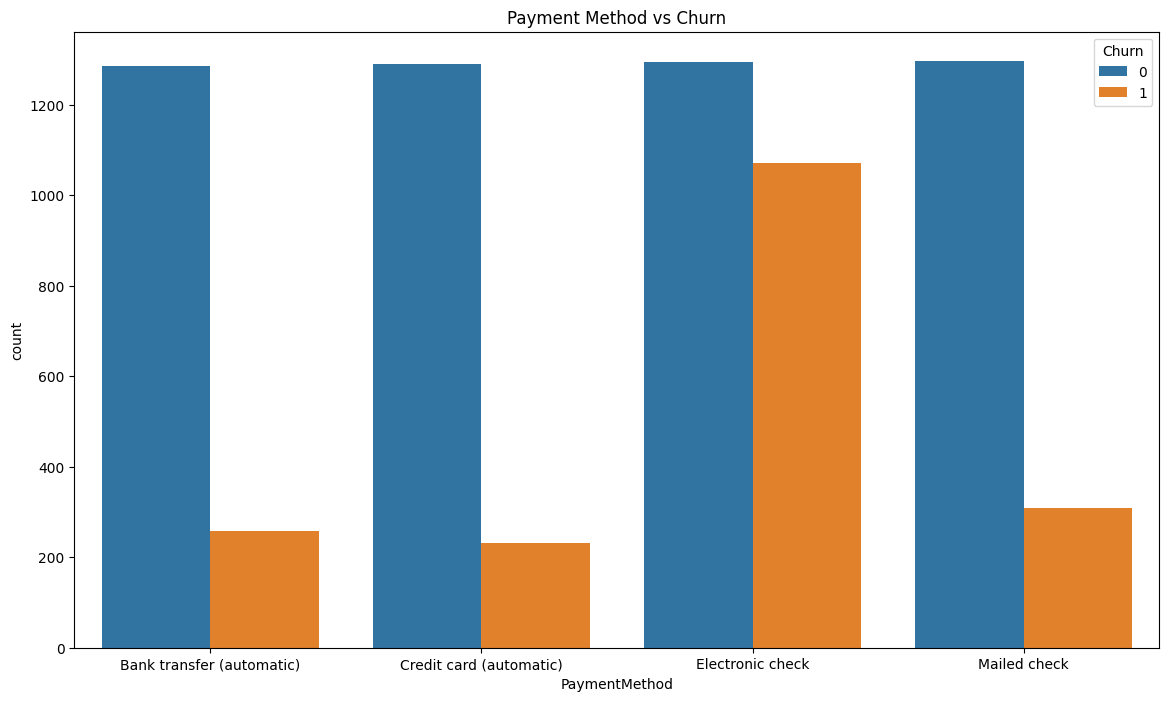

<Figure size 640x480 with 0 Axes>

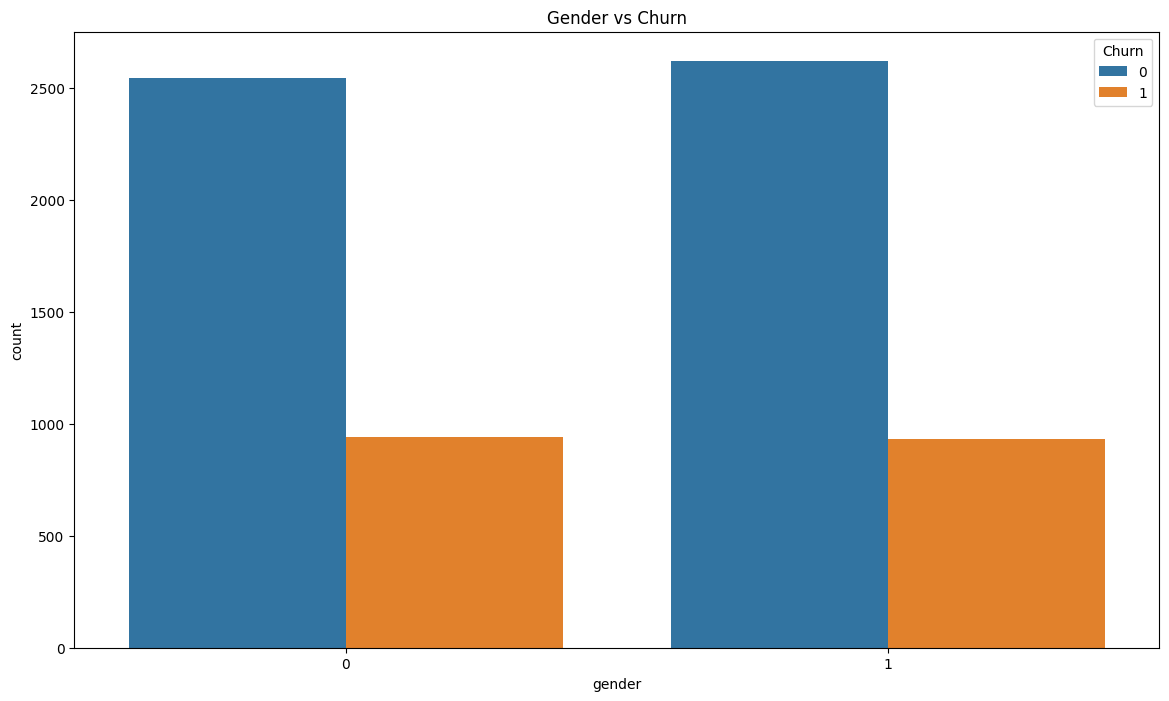

<Figure size 640x480 with 0 Axes>

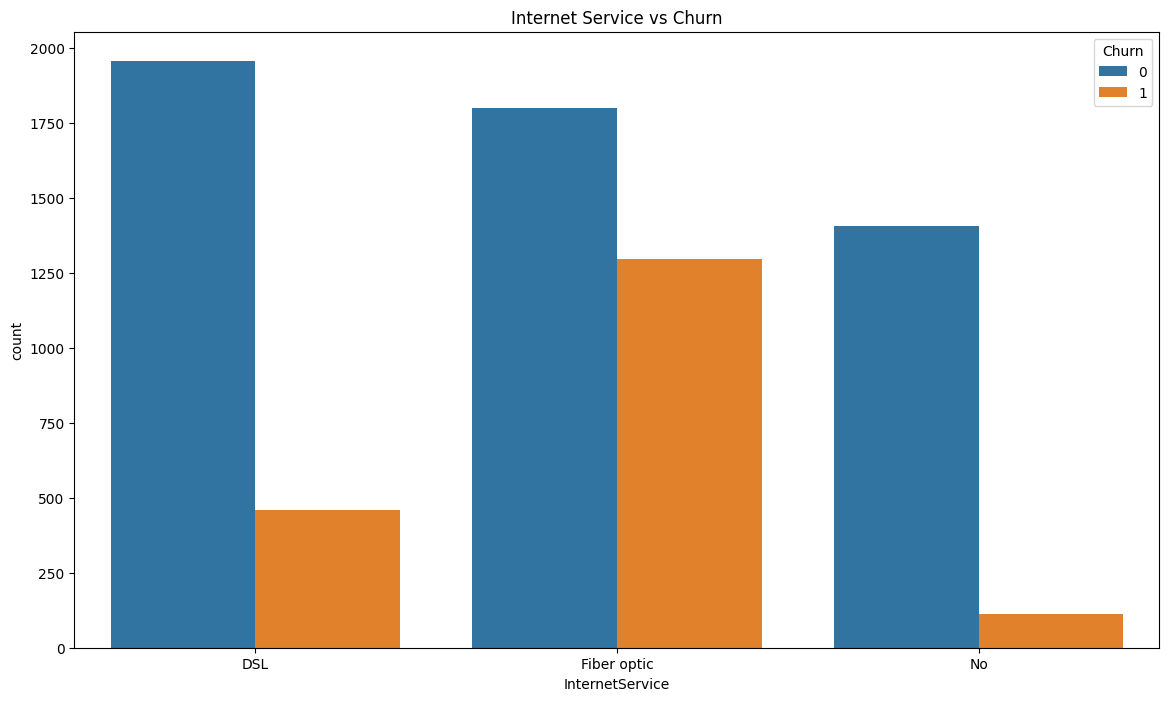

<Figure size 640x480 with 0 Axes>

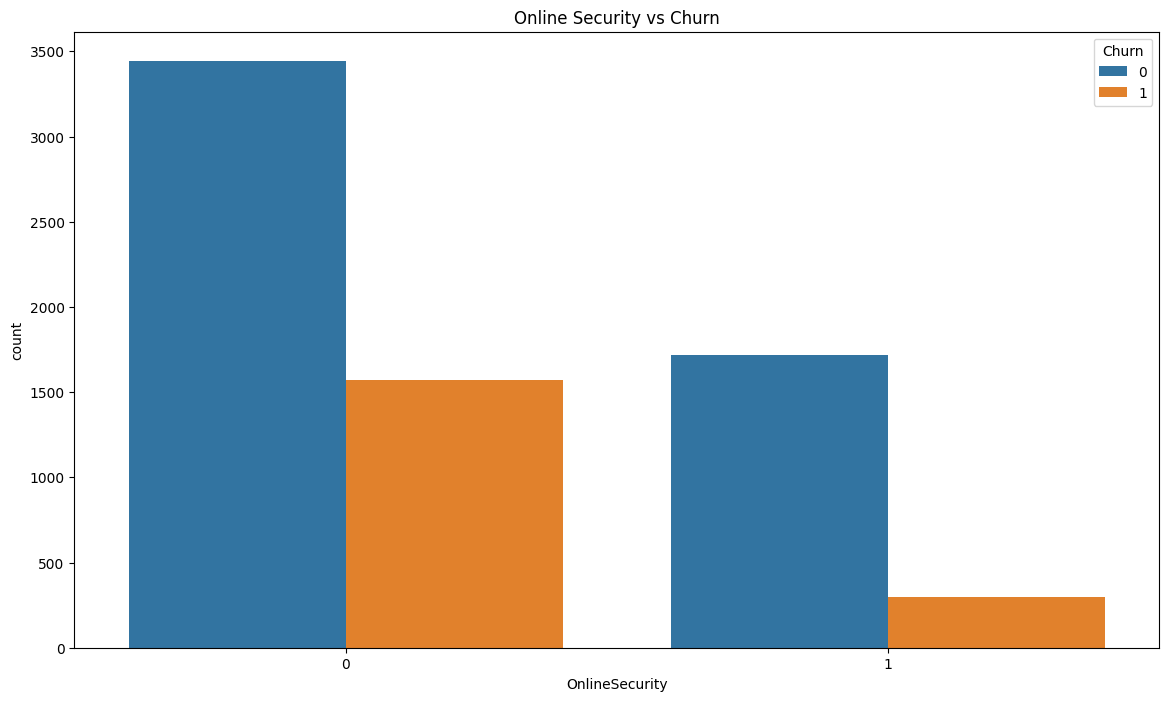

<Figure size 640x480 with 0 Axes>

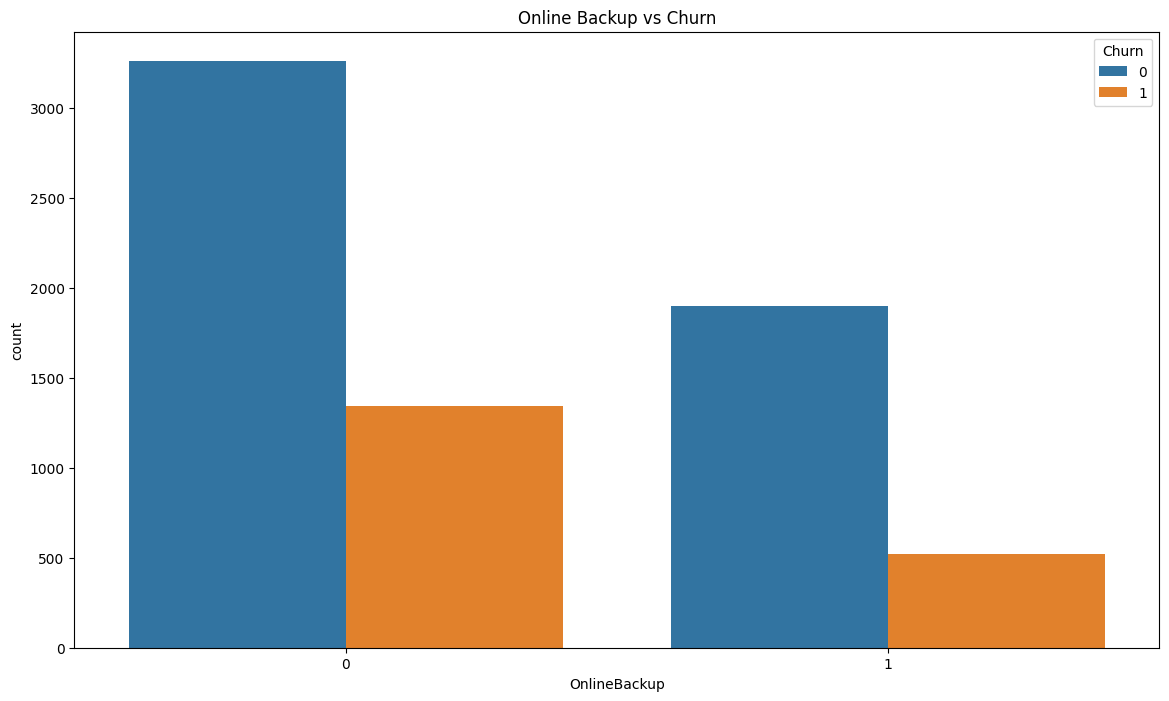

<Figure size 640x480 with 0 Axes>

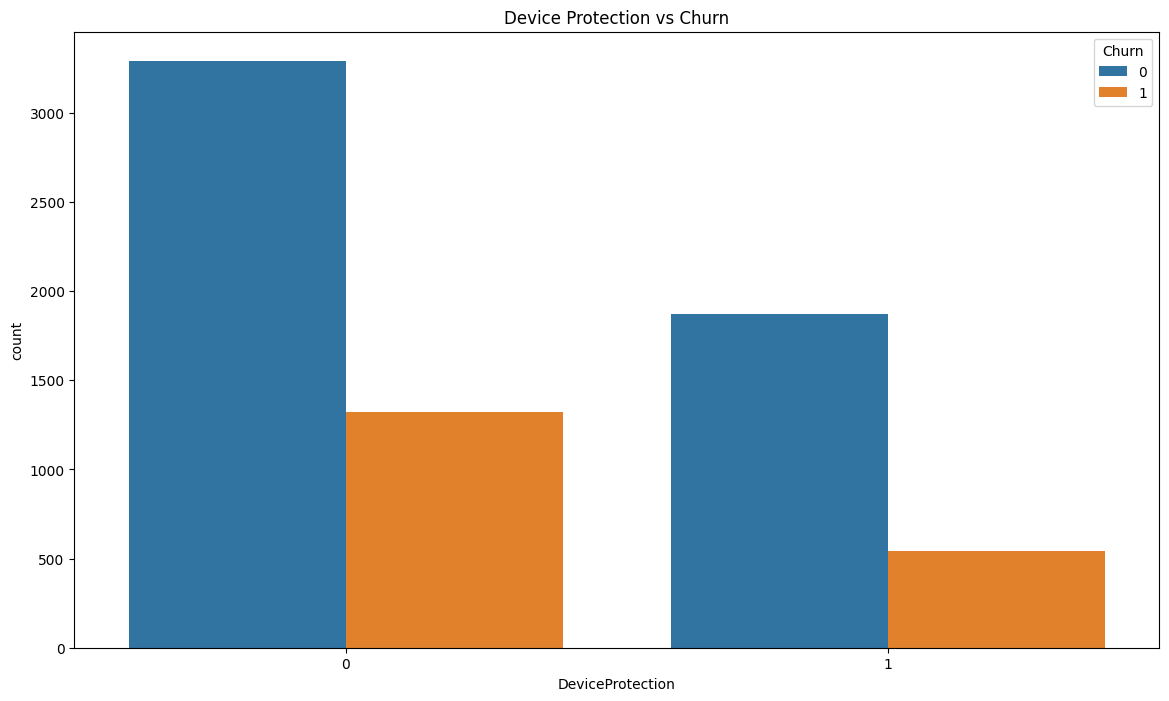

<Figure size 640x480 with 0 Axes>

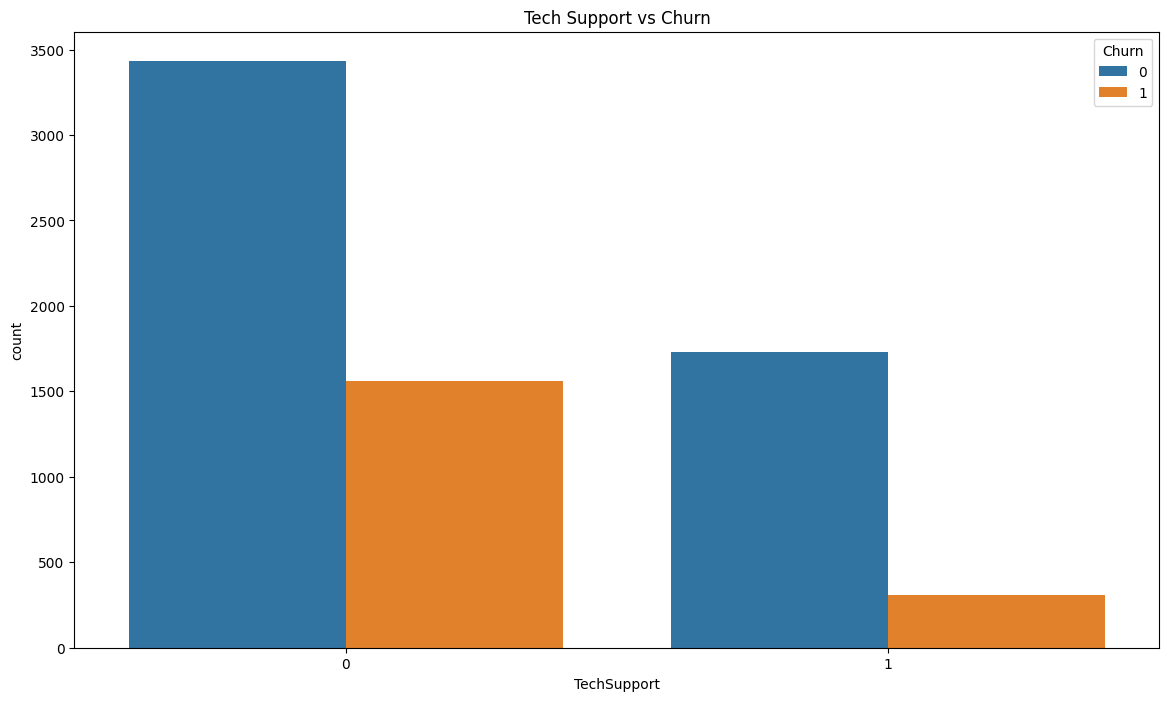

<Figure size 640x480 with 0 Axes>

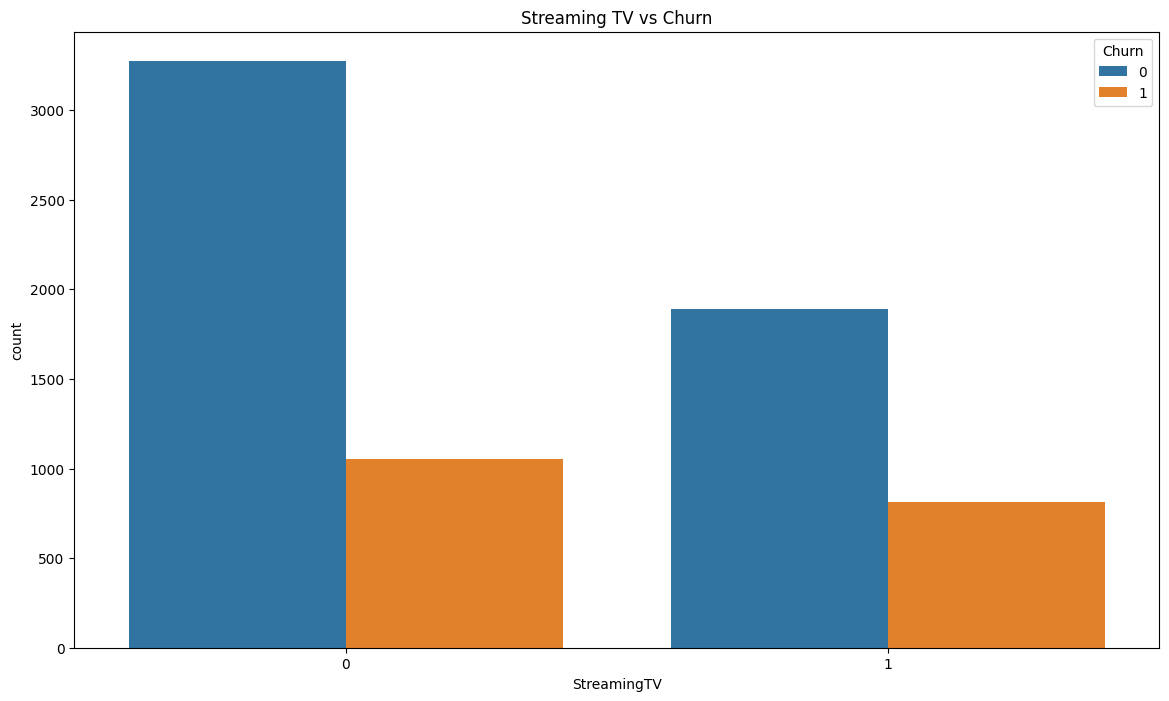

<Figure size 640x480 with 0 Axes>

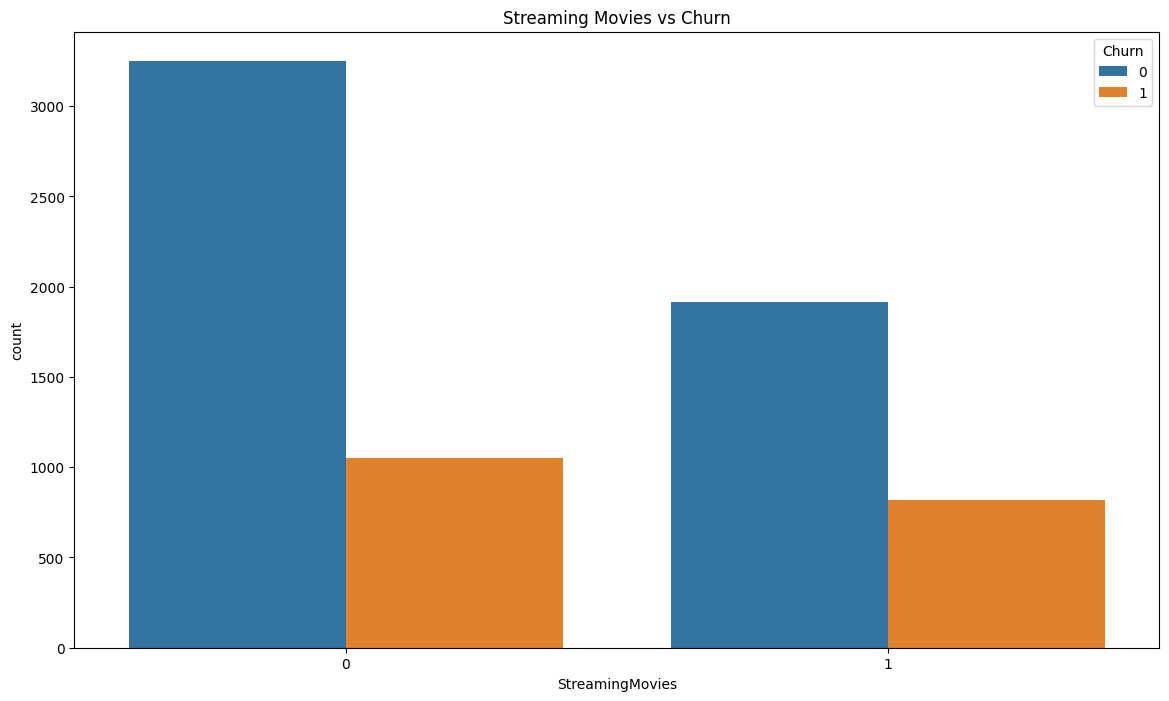

<Figure size 640x480 with 0 Axes>

In [20]:
display(df[['Type', 'Churn']].head(10))

# Función para graficar y resetear
def plot_and_reset(df, x, hue, title):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=df, x=x, hue=hue)
    plt.title(title)
    plt.show()
    plt.clf()

# Graficar cada uno
plot_and_reset(df, 'Type', 'Churn', 'Contract Type vs Churn')
plot_and_reset(df, 'PaymentMethod', 'Churn', 'Payment Method vs Churn')
plot_and_reset(df, 'gender', 'Churn', 'Gender vs Churn')
plot_and_reset(df, 'InternetService', 'Churn', 'Internet Service vs Churn')
plot_and_reset(df, 'OnlineSecurity', 'Churn', 'Online Security vs Churn')
plot_and_reset(df, 'OnlineBackup', 'Churn', 'Online Backup vs Churn')
plot_and_reset(df, 'DeviceProtection', 'Churn', 'Device Protection vs Churn')
plot_and_reset(df, 'TechSupport', 'Churn', 'Tech Support vs Churn')
plot_and_reset(df, 'StreamingTV', 'Churn', 'Streaming TV vs Churn')
plot_and_reset(df, 'StreamingMovies', 'Churn', 'Streaming Movies vs Churn')

In [21]:
# Verificar la cantidad de valores NaN en cada columna
print(df.isnull().sum())

customerID             0
BeginDate              0
EndDate             5163
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
Churn                  0
dtype: int64


# Creacion de las variables dummys

In [22]:
# Crear variables dummy para columnas categóricas
df = pd.get_dummies(df, columns=['Type', 'PaymentMethod', 'InternetService'], drop_first=True)

# Verificar los tipos de datos después de la conversión
display(df.dtypes)

# Eliminar columnas no numéricas antes de calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['int64', 'float64', 'uint8'])

# Verificar nuevamente datos faltantes
display(df.isnull().sum())

# Estadísticas descriptivas después de la conversión
display(df.describe(include='all'))

customerID                                       object
BeginDate                                datetime64[ns]
EndDate                                  datetime64[ns]
PaperlessBilling                                  int64
MonthlyCharges                                  float64
TotalCharges                                    float64
gender                                            int64
SeniorCitizen                                     int64
Partner                                           int64
Dependents                                        int64
OnlineSecurity                                    int64
OnlineBackup                                      int64
DeviceProtection                                  int64
TechSupport                                       int64
StreamingTV                                       int64
StreamingMovies                                   int64
MultipleLines                                     int64
Churn                                          c

customerID                                  0
BeginDate                                   0
EndDate                                  5163
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                                0
gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
MultipleLines                               0
Churn                                       0
Type_One year                               0
Type_Two year                               0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check    

,customerID,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,...,StreamingMovies,MultipleLines,Churn,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
count,7032,7032,1869,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.0,7032,7032,7032,7032,7032,7032,7032
unique,7032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,2,2,2,2,2,2,2
top,7590-VHVEG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,False,False,False,False,False,False,False
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5163.0,5560,5347,5511,4667,5428,3936,5512
mean,NaN,2017-04-28 23:14:44.641638400,2019-11-15 21:31:18.009630976,0.592719,64.798208,2283.300441,0.504693,0.162400,0.482509,0.298493,...,0.388367,0.421928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2013-10-01 00:00:00,2019-10-01 00:00:00,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2015-06-01 00:00:00,2019-11-01 00:00:00,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017-09-01 00:00:00,2019-11-01 00:00:00,1.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2019-04-01 00:00:00,2019-12-01 00:00:00,1.000000,89.862500,3794.737500,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
display(df.head())

,customerID,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,...,StreamingMovies,MultipleLines,Churn,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,2020-01-01,NaT,1,29.85,29.85,0,0,1,0,...,0,0,0,False,False,False,True,False,False,False
1,5575-GNVDE,2017-04-01,NaT,0,56.95,1889.50,1,0,0,0,...,0,0,0,True,False,False,False,True,False,False
2,3668-QPYBK,2019-10-01,2019-12-01,1,53.85,108.15,1,0,0,0,...,0,0,1,False,False,False,False,True,False,False
3,7795-CFOCW,2016-05-01,NaT,0,42.30,1840.75,1,0,0,0,...,0,0,0,True,False,False,False,False,False,False
4,9237-HQITU,2019-09-01,2019-11-01,1,70.70,151.65,0,0,0,0,...,0,0,1,False,False,False,True,False,True,False


In [24]:
# Convertir columnas booleanas a enteros
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})

# Verificar los tipos de datos después de la conversión
display(df.dtypes)
display(df.head())
display(df.isna().sum())

customerID                                       object
BeginDate                                datetime64[ns]
EndDate                                  datetime64[ns]
PaperlessBilling                                  int64
MonthlyCharges                                  float64
TotalCharges                                    float64
gender                                            int64
SeniorCitizen                                     int64
Partner                                           int64
Dependents                                        int64
OnlineSecurity                                    int64
OnlineBackup                                      int64
DeviceProtection                                  int64
TechSupport                                       int64
StreamingTV                                       int64
StreamingMovies                                   int64
MultipleLines                                     int64
Churn                                          c

,customerID,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,...,StreamingMovies,MultipleLines,Churn,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,2020-01-01,NaT,1,29.85,29.85,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,5575-GNVDE,2017-04-01,NaT,0,56.95,1889.50,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,3668-QPYBK,2019-10-01,2019-12-01,1,53.85,108.15,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,7795-CFOCW,2016-05-01,NaT,0,42.30,1840.75,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,2019-09-01,2019-11-01,1,70.70,151.65,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


customerID                                  0
BeginDate                                   0
EndDate                                  5163
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                                0
gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
MultipleLines                               0
Churn                                       0
Type_One year                               0
Type_Two year                               0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check    

# Preguntas Aclaratorias

- Es correcto asumir que EndDate siendo diferente de 'No' indica churn?
- Hay algún periodo de tiempo específico que deberíamos considerar para nuestro análisis y modelado?
- Existe algun procedimiento estandar o preferido para manejar los datos faltantes en este dataset?
- Existen variables que no aporten informacion relevante para el analisis?


# Seleccion y Entrenamiento del Modelo

Para esta parte del proyecto utilizaremos los siguientes modelos de clasificacion ademas de utilizar diferentes metricas para evaluar el rendimiento de los modelos:

Modelos:
- Logistic Regression
- Random Forest
- Decision Tree
- Gradient Boosting
- K-Nearest Neighbors
- XGBoost

Metricas:
- AUROC
- F1 Score
- Precision
- Accuracy

En este caso usaremos una tecnica combinada de sobremuestreo y submuestreo para balancear los datos.

Resultados para Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1533
           1       0.52      0.77      0.62       577

    accuracy                           0.74      2110
   macro avg       0.71      0.75      0.71      2110
weighted avg       0.79      0.74      0.75      2110





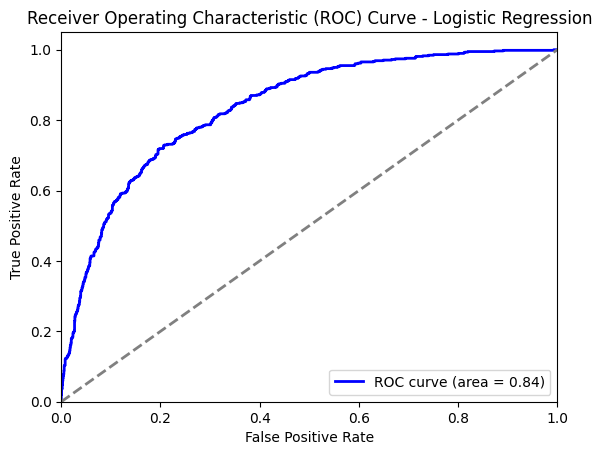

Resultados para Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1533
           1       0.61      0.59      0.60       577

    accuracy                           0.79      2110
   macro avg       0.73      0.73      0.73      2110
weighted avg       0.78      0.79      0.78      2110





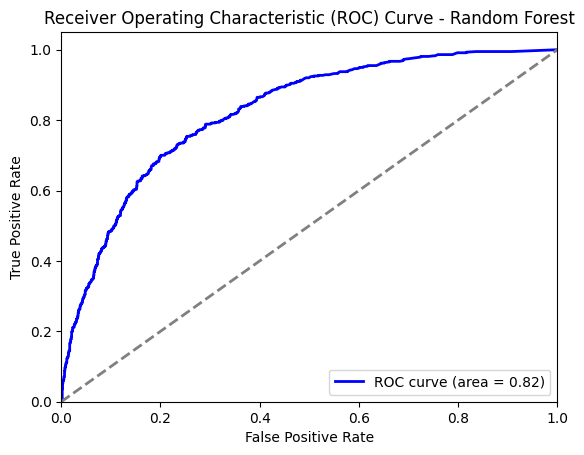

Resultados para XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1533
           1       0.60      0.56      0.58       577

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.77      0.78      0.77      2110





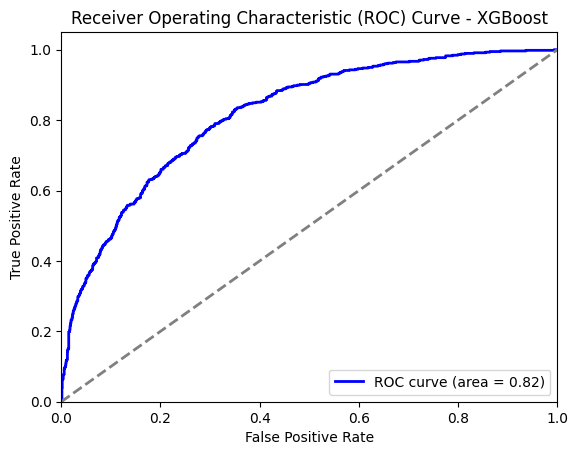

Resultados para K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.84      0.76      0.79      1533
           1       0.48      0.61      0.54       577

    accuracy                           0.72      2110
   macro avg       0.66      0.68      0.67      2110
weighted avg       0.74      0.72      0.73      2110





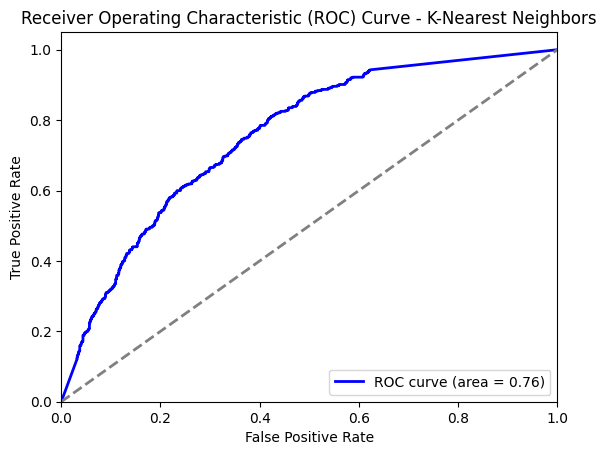

Resultados para Gradient Boosting:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1533
           1       0.60      0.60      0.60       577

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110





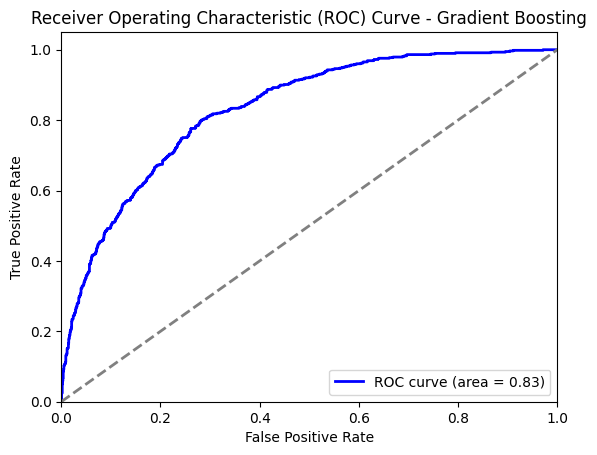

Resultados para Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1533
           1       0.51      0.71      0.59       577

    accuracy                           0.74      2110
   macro avg       0.69      0.73      0.70      2110
weighted avg       0.77      0.74      0.75      2110





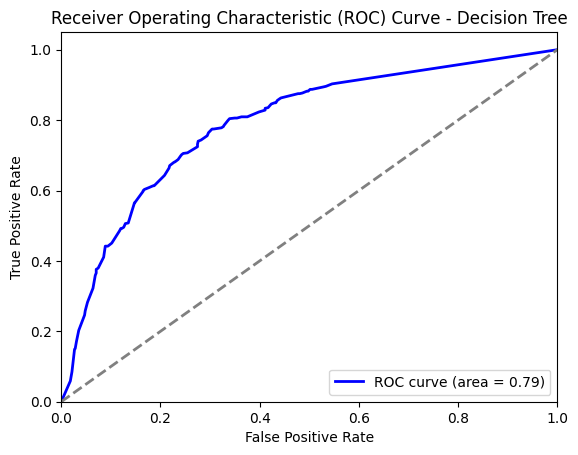

,Accuracy,AUROC,F1 Score,Precision
Logistic Regression,0.742654,0.836181,0.621603,0.519814
Random Forest,0.785308,0.822877,0.601583,0.610714
XGBoost,0.775829,0.816375,0.578055,0.595588
K-Nearest Neighbors,0.716114,0.755261,0.539585,0.484807
Gradient Boosting,0.780569,0.830418,0.599134,0.598616
Decision Tree,0.735071,0.789415,0.593455,0.511278


In [25]:
X = df.drop(['Churn', 'customerID', 'BeginDate', 'EndDate'], axis=1)
y = df['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementar SMOTE para balancear las clases
smote = SMOTE(random_state=12345)
X_train_balanced_SMOTE, y_train_balanced_SMOTE = smote.fit_resample(X_train_scaled, y_train)

# Diccionario para almacenar los resultados
results_SMOTE = {}

# Función para evaluar un modelo
def evaluate_model(model_name, model):
    # Entrenar el modelo
    model.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
    
    # Predecir las etiquetas y las probabilidades
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Guardar los resultados
    results_SMOTE[model_name] = {
        "Accuracy": accuracy,
        "AUROC": auc,
        "F1 Score": f1,
        "Precision": precision
    }
    
    # Imprimir el reporte de clasificación
    print(f"Resultados para {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")
    
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Graficar la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Espacios de hiperparámetros para Grid Search
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search y Evaluación para Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(random_state=12345), param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_lr = grid_search_lr.best_estimator_
evaluate_model("Logistic Regression", best_lr)

# Grid Search y Evaluación para Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=12345), param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_rf = grid_search_rf.best_estimator_
evaluate_model("Random Forest", best_rf)

# Grid Search y Evaluación para XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=12345, n_jobs=-1), param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xgb.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_xgb = grid_search_xgb.best_estimator_
evaluate_model("XGBoost", best_xgb)

# Grid Search y Evaluación para K-Nearest Neighbors
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_knn.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_knn = grid_search_knn.best_estimator_
evaluate_model("K-Nearest Neighbors", best_knn)

# Grid Search y Evaluación para Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=12345), param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_gb.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_gb = grid_search_gb.best_estimator_
evaluate_model("Gradient Boosting", best_gb)

# Grid Search y Evaluación para Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=12345), param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_dt.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_dt = grid_search_dt.best_estimator_
evaluate_model("Decision Tree", best_dt)

# Mostrar los resultados de todas las métricas para cada modelo
results_df = pd.DataFrame(results_SMOTE).T
display(results_df)

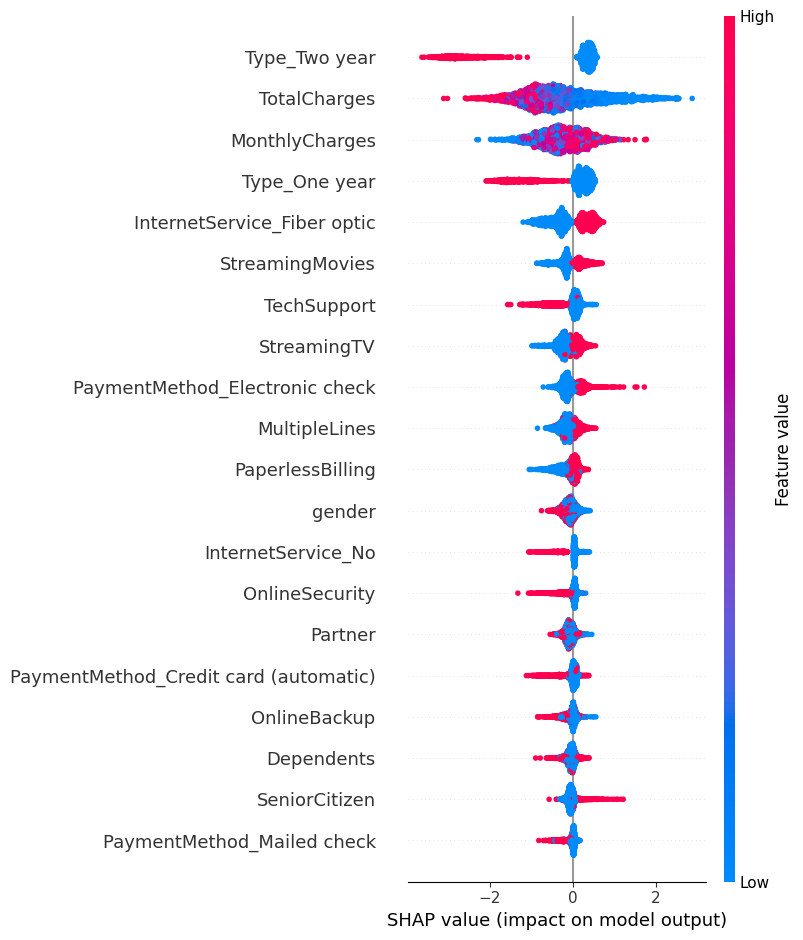

In [26]:
# Análisis de importancia de características usando SHAP para XGBoost
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


Podemos darnos cuenta que en analisis SHAP que las variables de Type_Two year, TotalCharges y MopnthlyCharges son las mas importantes para el modelo, lo cual tiene sentido ya que el tipo de contrato y los cargos mensuales son factores importantes para que un cliente decida si seguir con el servicio o no.

Tambien vemos Dependents, SeñiorCitizen y PaymentMethod_Electronic check tienen menos impacto y por lo tanto son menos importantes para el modelo.

El modelo parece estar bien ajustado a las caracteristicas que consideramos mas importantes, pero tambien muestra que algunas caracteristicas no son tan importantes como por ejemplo gender y partenr las cuales podriamos retirar para eliminar ruido en el modelo.

Los resultados de los modelos muestran un rendimiento variado en términos de las métricas de precisión, AUROC, F1 score y precisión. Aquí se presentan las conclusiones detalladas basadas en estos resultados:

#### Logistic Regression:

- Accuracy: 0.742654
- AUROC: 0.836181
- F1 Score: 0.621603
- Precision: 0.519814

La regresión logística muestra un buen rendimiento en términos de AUROC, destacándose como uno de los mejores modelos para la discriminación entre clases positivas y negativas. Sin embargo, su precisión es relativamente baja, lo que indica que el modelo podría mejorar en términos de identificar correctamente las instancias positivas.

#### Random Forest:

- Accuracy: 0.785308
- AUROC: 0.822877
- F1 Score: 0.601583
- Precision: 0.610714

Random Forest proporciona una buena precisión y un AUROC decente. Su capacidad para manejar conjuntos de datos desequilibrados y su robustez lo hacen una opción sólida. Sin embargo, hay espacio para mejorar, especialmente en términos de AUROC.

#### XGBoost:

- Accuracy: 0.775829
- AUROC: 0.816375
- F1 Score: 0.578055
- Precision: 0.595588

XGBoost, muestra un rendimiento ligeramente inferior en comparación con Random Forest, pero sigue siendo competitivo. La métrica AUROC sugiere que es bueno en la clasificación, pero su F1 score indica que puede no ser el mejor para conjuntos de datos muy desequilibrados.

#### K-Nearest Neighbors:

- Accuracy: 0.716114
- AUROC: 0.755261
- F1 Score: 0.539585
- Precision: 0.484807

K-Nearest Neighbors tiene el rendimiento más bajo en términos de AUROC y F1 score. Este modelo puede no ser ideal para este conjunto de datos, ya que su rendimiento sugiere dificultades para clasificar correctamente las instancias positivas.

#### Gradient Boosting:

- Accuracy: 0.780569
- AUROC: 0.830418
- F1 Score: 0.599134
- Precision: 0.598616

Gradient Boosting muestra un buen rendimiento general, con un AUROC cercano al de la regresión logística. Este modelo equilibra bien entre la precisión y la capacidad de discriminación, haciéndolo una opción viable para tareas de clasificación.

#### Decision Tree:

- Accuracy: 0.735071
- AUROC: 0.789415
- F1 Score: 0.593455
- Precision: 0.511278

El modelo de árbol de decisión tiene un rendimiento aceptable pero no sobresaliente. La métrica AUROC sugiere que no es tan eficaz en la discriminación de clases como algunos de los otros modelos evaluados.

Dado que los datos muestran aún un desbalanceo significativo, que impacta negativamente en el rendimiento de los modelos, es crucial explorar técnicas adicionales de balanceo de clases. Anteriormente, implementamos SMOTE para el sobremuestreo de la clase minoritaria, pero aún persisten problemas de precisión y recall. Para abordar este desafío de manera más efectiva, consideraremos el uso de técnicas combinadas de sobremuestreo (oversampling) y submuestreo (undersampling). La combinación de estas técnicas tiene el potencial de mitigar los efectos del desbalance de clases, mejorando la capacidad de los modelos para aprender patrones representativos tanto de la clase mayoritaria como de la minoritaria. En las siguientes secciones, se implementarán y evaluarán estas técnicas para determinar su impacto en el rendimiento de los modelos.

### Sobremuestreo y Submuestreo:

Resultados para Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1533
           1       0.51      0.78      0.62       577

    accuracy                           0.74      2110
   macro avg       0.71      0.75      0.71      2110
weighted avg       0.79      0.74      0.75      2110





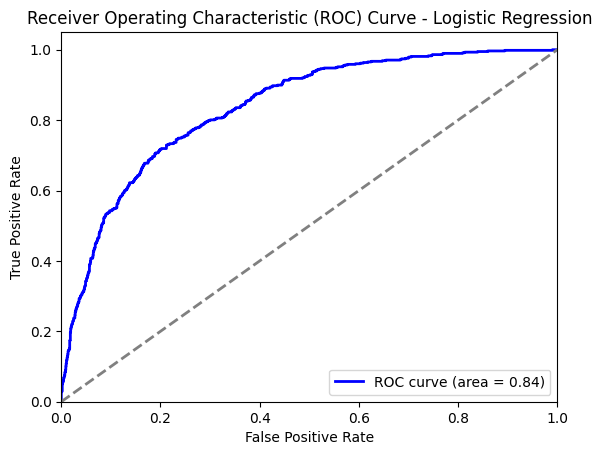

Resultados para Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1533
           1       0.53      0.81      0.64       577

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.81      0.75      0.76      2110





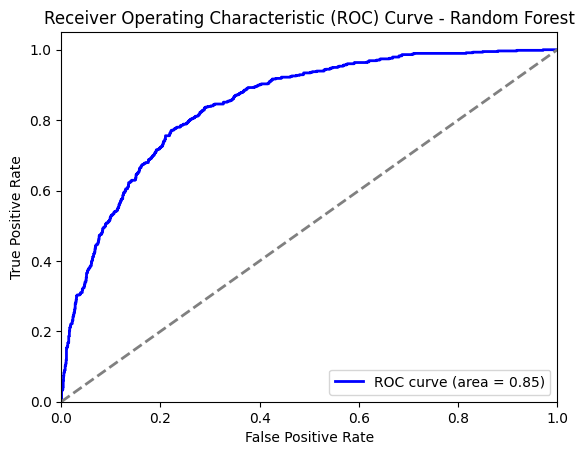

Resultados para XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1533
           1       0.52      0.83      0.64       577

    accuracy                           0.74      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.74      0.76      2110





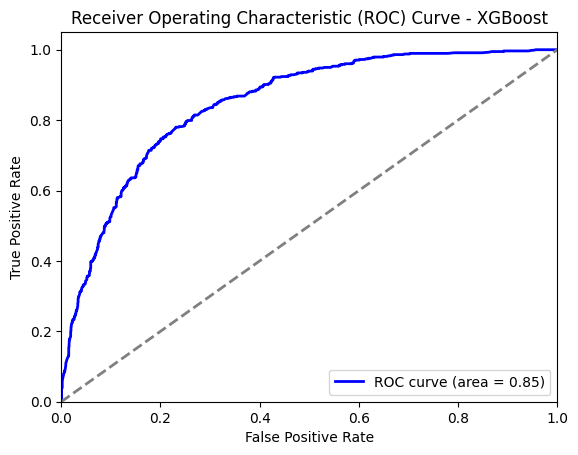

Resultados para K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1533
           1       0.46      0.83      0.59       577

    accuracy                           0.69      2110
   macro avg       0.69      0.73      0.67      2110
weighted avg       0.79      0.69      0.71      2110





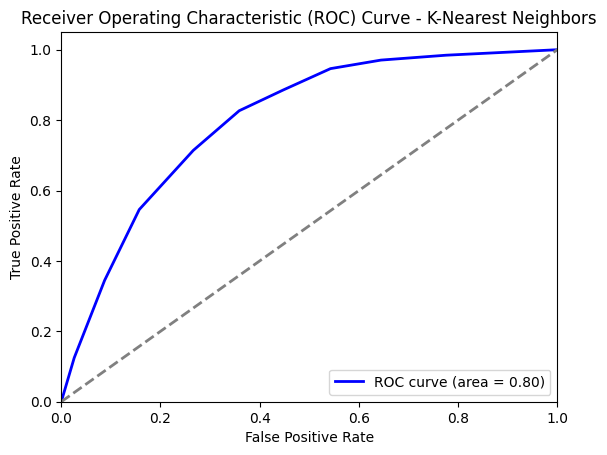

Resultados para Gradient Boosting:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1533
           1       0.52      0.82      0.64       577

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110





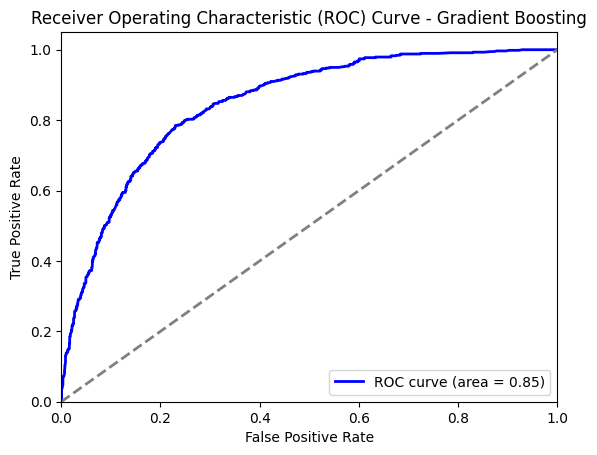

Resultados para Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1533
           1       0.48      0.73      0.58       577

    accuracy                           0.71      2110
   macro avg       0.68      0.72      0.68      2110
weighted avg       0.77      0.71      0.73      2110





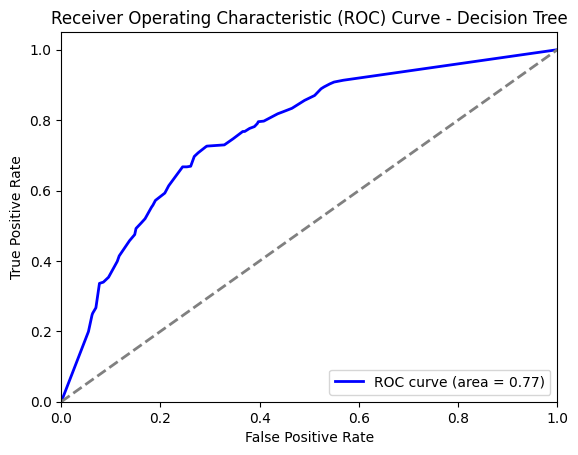

,Accuracy,AUROC,F1 Score,Precision
Logistic Regression,0.738863,0.836248,0.619738,0.514908
Random Forest,0.752607,0.845354,0.640990,0.531357
XGBoost,0.743128,0.847219,0.637701,0.519042
K-Nearest Neighbors,0.691943,0.798625,0.594763,0.464460
Gradient Boosting,0.746445,0.846364,0.638269,0.523282
Decision Tree,0.711848,0.765798,0.579530,0.482163


In [27]:
# Paso 1: Submuestreo (Undersampling)
undersampler = RandomUnderSampler(random_state=12345)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_scaled, y_train)

# Paso 2: Sobremuestreo (Oversampling) con SMOTE
smote = SMOTE(random_state=12345)
X_train_balanced_SMOTE, y_train_balanced_SMOTE = smote.fit_resample(X_train_undersampled, y_train_undersampled)

# Diccionario para almacenar los resultados
results_under_over = {}

# Función para evaluar un modelo
def evaluate_model(model_name, model):
    # Entrenar el modelo
    model.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
    
    # Predecir las etiquetas y las probabilidades
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Guardar los resultados
    results_under_over[model_name] = {
        "Accuracy": accuracy,
        "AUROC": auc,
        "F1 Score": f1,
        "Precision": precision
    }
    
    # Imprimir el reporte de clasificación
    print(f"Resultados para {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")
    
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Graficar la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


# Grid Search y Evaluación para Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(random_state=12345), param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_lr = grid_search_lr.best_estimator_
evaluate_model("Logistic Regression", best_lr)

# Grid Search y Evaluación para Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=12345), param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_rf = grid_search_rf.best_estimator_
evaluate_model("Random Forest", best_rf)

# Grid Search y Evaluación para XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=12345, n_jobs=-1), param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xgb.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_xgb = grid_search_xgb.best_estimator_
evaluate_model("XGBoost", best_xgb)

# Grid Search y Evaluación para K-Nearest Neighbors
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_knn.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_knn = grid_search_knn.best_estimator_
evaluate_model("K-Nearest Neighbors", best_knn)

# Grid Search y Evaluación para Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=12345), param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_gb.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_gb = grid_search_gb.best_estimator_
evaluate_model("Gradient Boosting", best_gb)

# Grid Search y Evaluación para Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=12345), param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_dt.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_dt = grid_search_dt.best_estimator_
evaluate_model("Decision Tree", best_dt)

# Mostrar los resultados de todas las métricas para cada modelo
results_df = pd.DataFrame(results_under_over).T
display(results_df)


Podemos ver mejoras en las metricas de los modelos, lo cual indica que la combinacion de sobremuestreo y submuestreo es una buena tecnica para balancear los datos.

Considerando que el objetivo es minimizar el churn, se recomienda priorizar los modelos con el AUROC más alto. La técnica combinada, a pesar de reducir la precisión, ha demostrado mejorar el AUROC en algunos modelos, lo que respalda su uso en este contexto.

Aun asi vamos a seguir mejorando el modelo para obtener mejores resultados.

# Optimizacion

Vamos a realizar algunas optimizaciones en los modelos para mejorar su rendimiento.

Entre las técnicas de optimización que se pueden aplicar a los modelos de clasificación, se encuentran:

- Stacking: Esta tecnica se centra en combinar varios modelos de clasificación para mejorar la precisión general, lo utilizaremos para combinar los modelos de regresión logística, random forest, XGBoost y gradient boosting que han mostrado un buen rendimiento en términos de AUROC.


- Bayesian Optimization: Esta tecnica se basa en optimizar los hiperparámetros de los modelos de clasificación utilizando métodos bayesianos, lo utilizaremos para encontrar los mejores hiperparámetros para los modelos de regresión logística, random forest, XGBoost y gradient boosting.

Resultados para Stacking Classifier - Optimized:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1533
           1       0.53      0.81      0.64       577

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



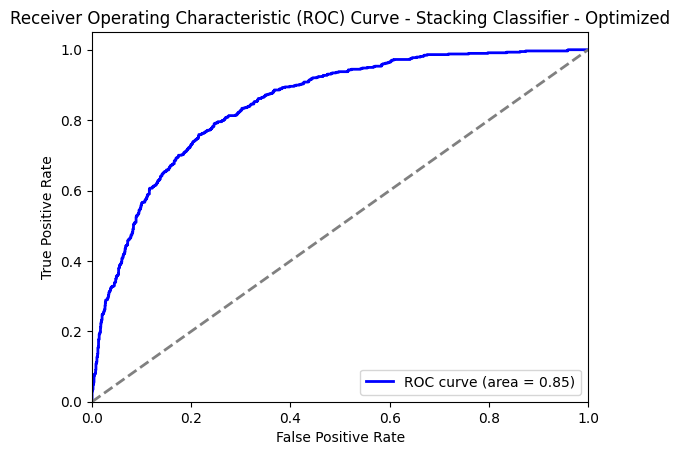

In [29]:
# Definir los modelos base para Stacking
estimators = [
    ('lr', LogisticRegression(random_state=12345)),
    ('rf', RandomForestClassifier(random_state=12345)),
    ('xgb', XGBClassifier(random_state=12345, n_jobs=-1)),
    ('gb', GradientBoostingClassifier(random_state=12345))
]

# Definir el metamodelo
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Definir el espacio de búsqueda para Bayesian Optimization
search_spaces = {
    'final_estimator__C': (0.1, 10.0, 'log-uniform'),
    'final_estimator__solver': ['liblinear', 'lbfgs'],
    'rf__n_estimators': (100, 500),
    'rf__max_depth': (10, 50),
    'xgb__n_estimators': (100, 500),
    'xgb__learning_rate': (0.01, 0.2, 'log-uniform'),
    'gb__n_estimators': (100, 500),
    'gb__learning_rate': (0.01, 0.2, 'log-uniform')
}

# Realizar la optimización bayesiana
opt_stacking = BayesSearchCV(
    stacking_model,
    search_spaces,
    n_iter=32,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=12345
)

opt_stacking.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
best_stacking = opt_stacking.best_estimator_

# Evaluar el modelo de stacking optimizado
def evaluate_model(model_name, model):
    model.fit(X_train_balanced_SMOTE, y_train_balanced_SMOTE)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    results_optimized[model_name] = {
        "Accuracy": accuracy,
        "AUROC": auc,
        "F1 Score": f1,
        "Precision": precision
    }
    print(f"Resultados para {model_name}:")
    print(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

results_optimized = {}
evaluate_model("Stacking Classifier - Optimized", best_stacking)

In [36]:
# Convertir los resultados en un DataFrame para visualización
results_optimized = pd.DataFrame(results_optimized).T
display(results_optimized)

,Accuracy,AUROC,F1 Score,Precision
Stacking Classifier - Optimized,0.749763,0.847532,0.638356,0.527746


Como podemos ver en los resultados, el modelo de stacking ha mejorado significativamente el rendimiento en términos de AUROC, F1 score y precisión. Esto sugiere que la combinación de modelos puede ser una estrategia efectiva para mejorar la capacidad de clasificación en conjuntos de datos desequilibrados. Además, la optimización de hiperparámetros ha permitido ajustar los modelos a las características específicas de los datos, mejorando aún más su rendimiento.

In [34]:
# Crear DataFrames de resultados previos si no los tienes aún
results_SMOTE_df = pd.DataFrame(results_SMOTE).T
results_under_over_df = pd.DataFrame(results_under_over).T


all_results_df = pd.concat([results_SMOTE_df, results_under_over_df, results_optimized])
display(all_results_df)

,Accuracy,AUROC,F1 Score,Precision
Logistic Regression,0.742654,0.836181,0.621603,0.519814
Random Forest,0.785308,0.822877,0.601583,0.610714
XGBoost,0.775829,0.816375,0.578055,0.595588
K-Nearest Neighbors,0.716114,0.755261,0.539585,0.484807
Gradient Boosting,0.780569,0.830418,0.599134,0.598616
Decision Tree,0.735071,0.789415,0.593455,0.511278
Logistic Regression,0.738863,0.836248,0.619738,0.514908
Random Forest,0.752607,0.845354,0.640990,0.531357
XGBoost,0.743128,0.847219,0.637701,0.519042
K-Nearest Neighbors,0.691943,0.798625,0.594763,0.464460


En esta tabla podemos ver todos los resultados de los modelos junto con sus optimizaciones.

# Conclusiones


## Impacto del Balanceo de Clases:

#### SMOTE:

Aplicar SMOTE resultó en una mejora significativa en el AUROC y F1 Score en comparación con otros métodos de balanceo, sugiriendo que SMOTE es efectivo para manejar el desbalanceo de clases al generar nuevas instancias sintéticas de la clase minoritaria. Esto permitió a los modelos aprender mejor las características de ambas clases.

#### Técnica Combinada (Submuestreo + Sobremuestreo): 

La combinación de submuestreo y sobremuestreo ofreció una mejora adicional en el AUROC, particularmente en modelos como Random Forest, XGBoost, y Gradient Boosting. Sin embargo, se observó una reducción en la precisión general (accuracy), lo cual es un comportamiento esperado cuando se reduce el sesgo en un conjunto de datos desbalanceado.


## Modelos Individuales:

#### Regresión Logística: 

Aunque tuvo un AUROC alto, su F1 Score y Precision fueron menores en comparación con otros modelos como Random Forest o Gradient Boosting, lo que sugiere que puede no ser la mejor opción cuando se busca un equilibrio entre estas métricas.

#### Gradient Boosting: 

Mostró un rendimiento sólido con un buen equilibrio entre AUROC, F1 Score y Precision, lo que lo convierte en una opción confiable para problemas de clasificación en conjuntos de datos desbalanceados.

#### XGBoost: 

Similar a Gradient Boosting, XGBoost también tuvo un buen rendimiento, destacándose particularmente en la técnica combinada de balanceo.


#### Stacking Classifier - Optimized:

El modelo de Stacking optimizado demostró tener el mejor AUROC (0.847532), indicando que la combinación de múltiples modelos base con optimización bayesiana puede mejorar la capacidad de discriminar entre las clases, especialmente en un entorno desbalanceado. Aunque su F1 Score y Precision no superaron significativamente a los modelos individuales, el AUROC superior lo convierte en una opción excelente para tareas donde la discriminación entre clases es prioritaria.
Consideraciones Finales:

El AUROC es la métrica más relevante en este contexto, dado que el objetivo es identificar con precisión el churn. El Stacking Classifier optimizado con la técnica combinada de balanceo es el que mejor cumple con este objetivo.
Aunque no se probó un modelo sin balanceo, los resultados sugieren que las técnicas de balanceo aplicadas fueron esenciales para mejorar el rendimiento del modelo en un contexto de desbalanceo de clases.


# Informe

- ¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?
- ¿Qué dificultades encontraste y cómo lograste resolverlas?
- ¿Cuáles fueron algunos de los pasos clave para resolver la tarea?
- ¿Cuál es tu modelo final y qué nivel de calidad tiene?

# ¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?

Este fue el plan:

- Definicion del Objetivo y Preparacion de los datos
    - Objetivo: Definir claramente la variable objetivo (Churn) basada en la columna EndDate.
    - Definición de Churn: Crear una nueva columna Churn

- Análisis Exploratorio de Datos
    - Visualizaciones
    - Correlaciones

- Preprocesamiento de Datos
    - Cambiar tipos de datos
    - Rellenar datos faltantes
    - Crear variables dummies
    - Normalizacion segun sea necesario

- Seleccion y Entrenamiento del Modelo
    - Seleccion de Modelo
    - Entrenamiento
    - Evaluacion

- Evaluacion y Mejora del Modelo
    - Evaluacion
    - Mejora
    - Evaluacion Final

- Conclusiones y Recomendaciones

Se realizaron todos los pasos, pero se agregaron algunos pasos extras como el balanceo de clases y las tecnicas de optimizacion pero lo que se omitio fue la eliminacion de variables que no aportan informacion relevante para el analisis, segun el analisis SHAP.


# ¿Qué dificultades encontraste y cómo lograste resolverlas?

Fue entretenido investigar sobre las tecnicas de balanceo de clases y las tecnicas de optimizacion, pero en general no hubo dificultades en el proyecto, aunque me hubiera gustado poder llenar a un AUROC mas alto en los modelos, probablemente investigando mas sobre las tecnicas de optimizacion podria haber logrado mejores resultados.

# ¿Cuáles fueron algunos de los pasos clave para resolver la tarea?

El entender el problema y definir claramente el objetivo fue clave para resolver la tarea, ademas de entender los datos y como se relacionan entre si, tambien fue clave el entender las metricas de evaluacion y como interpretarlas para poder mejorar los modelos.


# ¿Cuál es tu modelo final y qué nivel de calidad tiene?

El modelo final fue un Stacking Classifier con una combinacion de modelos de regresion logistica, random forest, XGBoost y gradient boosting, con una tecnica de balanceo de clases combinada de sobremuestreo y submuestreo, ademas de una optimizacion de hiperparametros con Bayesian Optimization.

La calidad del modelo es buena con una exactitud de 0.749763, un AUROC de 0.847532, un F1 Score de 0.638356 y una precision de 0.527746, lo cual indica que el modelo es capaz de identificar correctamente el churn en los clientes.